### Abstract

# I. Introduction

### Load packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### Data collection

In [2]:
sales_data = pd.read_csv(r'../Raw_Data/SalesForCourse_quizz_table.csv')

### Data defintion

In [3]:
print(sales_data.shape) 

(34867, 16)


In [4]:
print(sales_data.head()) 

   index      Date    Year     Month  Customer Age Customer Gender  \
0      0  02/19/16  2016.0  February          29.0               F   
1      1  02/20/16  2016.0  February          29.0               F   
2      2  02/27/16  2016.0  February          29.0               F   
3      3  03/12/16  2016.0     March          29.0               F   
4      4  03/12/16  2016.0     March          29.0               F   

         Country       State Product Category     Sub Category  Quantity  \
0  United States  Washington      Accessories  Tires and Tubes       1.0   
1  United States  Washington         Clothing           Gloves       2.0   
2  United States  Washington      Accessories  Tires and Tubes       3.0   
3  United States  Washington      Accessories  Tires and Tubes       2.0   
4  United States  Washington      Accessories  Tires and Tubes       3.0   

   Unit Cost  Unit Price   Cost  Revenue  Column1  
0      80.00  109.000000   80.0    109.0      NaN  
1      24.50   28.

In [5]:
print(sales_data.info())  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34867 entries, 0 to 34866
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             34867 non-null  int64  
 1   Date              34866 non-null  object 
 2   Year              34866 non-null  float64
 3   Month             34866 non-null  object 
 4   Customer Age      34866 non-null  float64
 5   Customer Gender   34866 non-null  object 
 6   Country           34866 non-null  object 
 7   State             34866 non-null  object 
 8   Product Category  34866 non-null  object 
 9   Sub Category      34866 non-null  object 
 10  Quantity          34866 non-null  float64
 11  Unit Cost         34866 non-null  float64
 12  Unit Price        34866 non-null  float64
 13  Cost              34866 non-null  float64
 14  Revenue           34867 non-null  float64
 15  Column1           2574 non-null   float64
dtypes: float64(8), int64(1), object(7)
memor

In [6]:
print(sales_data.columns)

Index(['index', 'Date', 'Year', 'Month', 'Customer Age', 'Customer Gender',
       'Country', 'State', 'Product Category', 'Sub Category', 'Quantity',
       'Unit Cost', 'Unit Price', 'Cost', 'Revenue', 'Column1'],
      dtype='object')


In [7]:
print(sales_data['Sub Category'].unique()) # 17 unique values

['Tires and Tubes' 'Gloves' 'Helmets' 'Bike Stands' 'Mountain Bikes'
 'Hydration Packs' 'Jerseys' 'Fenders' 'Cleaners' 'Socks' 'Caps'
 'Touring Bikes' 'Bottles and Cages' 'Vests' 'Road Bikes' 'Bike Racks'
 'Shorts' nan]


In [8]:
print(sales_data.nunique())

index               34867
Date                  576
Year                    2
Month                  12
Customer Age           70
Customer Gender         2
Country                 4
State                  45
Product Category        3
Sub Category           17
Quantity                3
Unit Cost             882
Unit Price           5175
Cost                  417
Revenue              3023
Column1              1281
dtype: int64


In [9]:
print(sales_data.describe())

              index          Year  Customer Age      Quantity     Unit Cost  \
count  34867.000000  34866.000000  34866.000000  34866.000000  34866.000000   
mean   17433.000000   2015.569237     36.382895      2.002524    349.880567   
std    10065.380254      0.495190     11.112902      0.813936    490.015846   
min        0.000000   2015.000000     17.000000      1.000000      0.670000   
25%     8716.500000   2015.000000     28.000000      1.000000     45.000000   
50%    17433.000000   2016.000000     35.000000      2.000000    150.000000   
75%    26149.500000   2016.000000     44.000000      3.000000    455.000000   
max    34866.000000   2016.000000     87.000000      3.000000   3240.000000   

         Unit Price          Cost       Revenue      Column1  
count  34866.000000  34866.000000  34867.000000  2574.000000  
mean     389.232485    576.004532    640.870093   688.054913  
std      525.319091    690.500395    736.640033   774.200897  
min        0.666667      2.000000   

# II. Data cleaning

In [10]:
print(sales_data.isnull().sum())

index                   0
Date                    1
Year                    1
Month                   1
Customer Age            1
Customer Gender         1
Country                 1
State                   1
Product Category        1
Sub Category            1
Quantity                1
Unit Cost               1
Unit Price              1
Cost                    1
Revenue                 0
Column1             32293
dtype: int64


In [11]:
sales_data[sales_data.isnull().any(axis=1)]

,index,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue,Column1
0,0,02/19/16,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,1.0,80.00,109.000000,80.0,109.000000,NaN
1,1,02/20/16,2016.0,February,29.0,F,United States,Washington,Clothing,Gloves,2.0,24.50,28.500000,49.0,57.000000,NaN
2,2,02/27/16,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,3.67,5.000000,11.0,15.000000,NaN
3,3,03/12/16,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,2.0,87.50,116.500000,175.0,233.000000,NaN
4,4,03/12/16,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,35.00,41.666667,105.0,125.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34862,34862,02/07/16,2016.0,February,38.0,M,France,Hauts de Seine,Bikes,Mountain Bikes,2.0,1160.00,985.500000,2320.0,1971.000000,NaN
34863,34863,03/13/15,2015.0,March,38.0,M,France,Hauts de Seine,Bikes,Mountain Bikes,1.0,2049.00,1583.000000,2049.0,1583.000000,NaN
34864,34864,04/05/15,2015.0,April,38.0,M,France,Hauts de Seine,Bikes,Mountain Bikes,3.0,683.00,560.666667,2049.0,1682.000000,NaN
34865,34865,08/30/15,2015.0,August,38.0,M,France,Hauts de Seine,Bikes,Mountain Bikes,1.0,2320.00,1568.000000,2320.0,1568.000000,NaN


In [12]:
sales_data.drop(34866, inplace=True)

In [13]:
sales_data[sales_data.isnull().any(axis=1)]

,index,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue,Column1
0,0,02/19/16,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,1.0,80.00,109.000000,80.0,109.0,NaN
1,1,02/20/16,2016.0,February,29.0,F,United States,Washington,Clothing,Gloves,2.0,24.50,28.500000,49.0,57.0,NaN
2,2,02/27/16,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,3.67,5.000000,11.0,15.0,NaN
3,3,03/12/16,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,2.0,87.50,116.500000,175.0,233.0,NaN
4,4,03/12/16,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,35.00,41.666667,105.0,125.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34861,34861,03/22/15,2015.0,March,38.0,M,France,Charente-Maritime,Bikes,Mountain Bikes,1.0,2049.00,1487.000000,2049.0,1487.0,NaN
34862,34862,02/07/16,2016.0,February,38.0,M,France,Hauts de Seine,Bikes,Mountain Bikes,2.0,1160.00,985.500000,2320.0,1971.0,NaN
34863,34863,03/13/15,2015.0,March,38.0,M,France,Hauts de Seine,Bikes,Mountain Bikes,1.0,2049.00,1583.000000,2049.0,1583.0,NaN
34864,34864,04/05/15,2015.0,April,38.0,M,France,Hauts de Seine,Bikes,Mountain Bikes,3.0,683.00,560.666667,2049.0,1682.0,NaN


In [14]:
sales_data.drop('Column1', axis=1, inplace=True)

In [15]:
sales_data[sales_data.isnull().any(axis=1)]

,index,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue


In [16]:
print(sales_data.isnull().sum())

index               0
Date                0
Year                0
Month               0
Customer Age        0
Customer Gender     0
Country             0
State               0
Product Category    0
Sub Category        0
Quantity            0
Unit Cost           0
Unit Price          0
Cost                0
Revenue             0
dtype: int64


In [17]:
print(sales_data.describe())

              index          Year  Customer Age      Quantity     Unit Cost  \
count  34866.000000  34866.000000  34866.000000  34866.000000  34866.000000   
mean   17432.500000   2015.569237     36.382895      2.002524    349.880567   
std    10065.091579      0.495190     11.112902      0.813936    490.015846   
min        0.000000   2015.000000     17.000000      1.000000      0.670000   
25%     8716.250000   2015.000000     28.000000      1.000000     45.000000   
50%    17432.500000   2016.000000     35.000000      2.000000    150.000000   
75%    26148.750000   2016.000000     44.000000      3.000000    455.000000   
max    34865.000000   2016.000000     87.000000      3.000000   3240.000000   

         Unit Price          Cost       Revenue  
count  34866.000000  34866.000000  34866.000000  
mean     389.232485    576.004532    640.870074  
std      525.319091    690.500395    736.650597  
min        0.666667      2.000000      2.000000  
25%       53.666667     85.000000    1

In [18]:
print(sales_data.duplicated().sum())

0


In [19]:
sales_data['Date'] = pd.to_datetime(sales_data['Date']) 

In [20]:
sales_data['Year'] = sales_data['Year'].astype(int)

# III. Analyzing the data

### Overall trend in revenue

The bike company has been in the market for several years, offering a wide range of bicycles for different customers and purposes. The company has seen a steady increase in sales over the years. In this analysis, we will be taking a closer look at the sales data of the bike company to understand the overall trend in revenue and identify any patterns or insights that can inform future business decisions.

In [21]:
sales_data.sort_values(by=['Date', 'Month'], inplace=True)

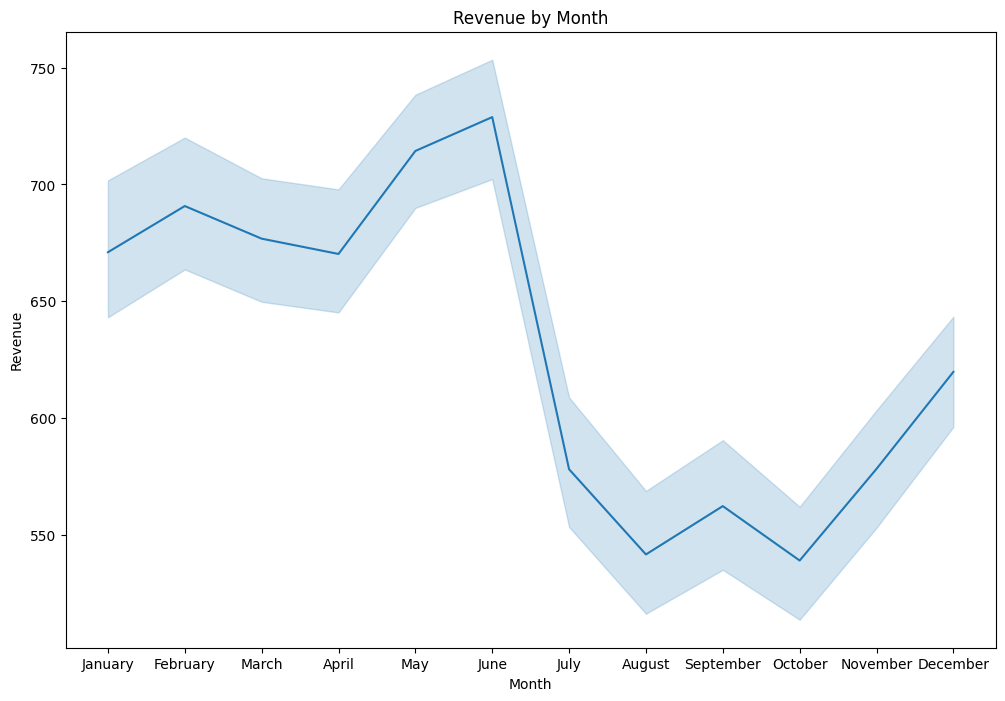

In [22]:
plt.figure(figsize=(12,8))
sns.lineplot(x='Month', y='Revenue', data=sales_data)
plt.title('Revenue by Month')
plt.show()

The bike company's sales data reveals a clear seasonal pattern, with revenue showing an increase during the late spring and early summer months. This is likely due to the favorable weather conditions that make cycling a more attractive activity during this period. However, this trend takes a sharp turn in July, with revenue dropping rapidly. The reason for this drop in sales is unclear but could be attributed to a combination of factors such as increased competition, changes in consumer behavior, or shifts in the overall economy. Following the drop in July, sales remain low throughout the fall before picking back up again in winter. This pattern of low fall sales and high winter sales may be due to the weather, with cold and wet conditions making cycling less appealing during the fall and winter months. 

In [23]:
sales_data = sales_data.assign(Season = sales_data['Month'].map({'January': '1 Winter', 'February': '1 Winter', 'March': '2 Spring', 'April': '2 Spring', 'May': '2 Spring', 'June': '3 Summer', 'July': '3 Summer', 'August': '3 Summer', 'September': '4 Fall', 'October': '4 Fall', 'November': '4 Fall', 'December': '1 Winter'}))

In [24]:
sales_data['Season'].value_counts()

2 Spring    10114
1 Winter     9208
3 Summer     8199
4 Fall       7345
Name: Season, dtype: int64

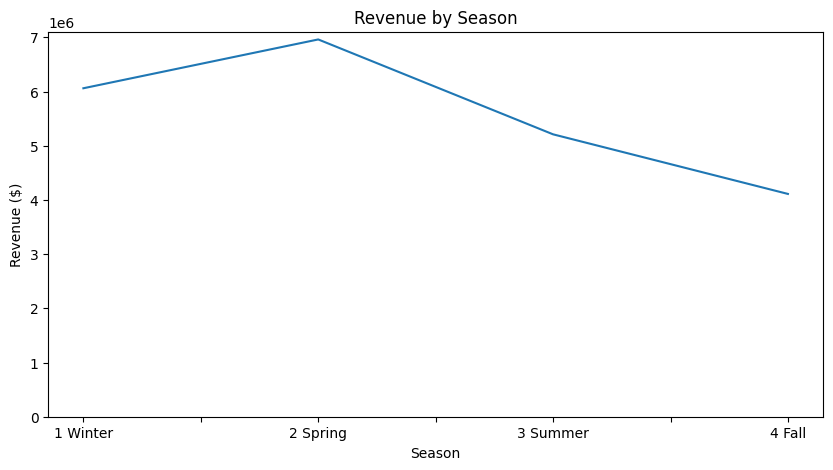

In [25]:
sales_data.groupby('Season')['Revenue'].sum().plot(kind='line', figsize=(10, 5))
plt.title('Revenue by Season')
plt.xlabel('Season')
plt.ylabel('Revenue ($)')
plt.ylim(bottom=0)
plt.show()

The above chart highlights the seasonal patterns in the company's revenue. It depicts the revenue of a bike company over the course of a year. It starts with a relatively low value during the winter months, representing low sales currently. The line gradually increases as we approach the spring, reaching a peak as revenue reaches its highest point for the year. The peak occurs during the spring, driven by the combination of good weather and increased demand from consumers. After the spring peak, the line starts to drop, showing a decline in revenue during the summer and fall months. This decrease in revenue is likely due to a combination of factors such as increased competition, changes in consumer behavior, and unfavorable weather conditions during these months. 

In [26]:
sales_data['Day'] = sales_data['Date'].dt.day_name()

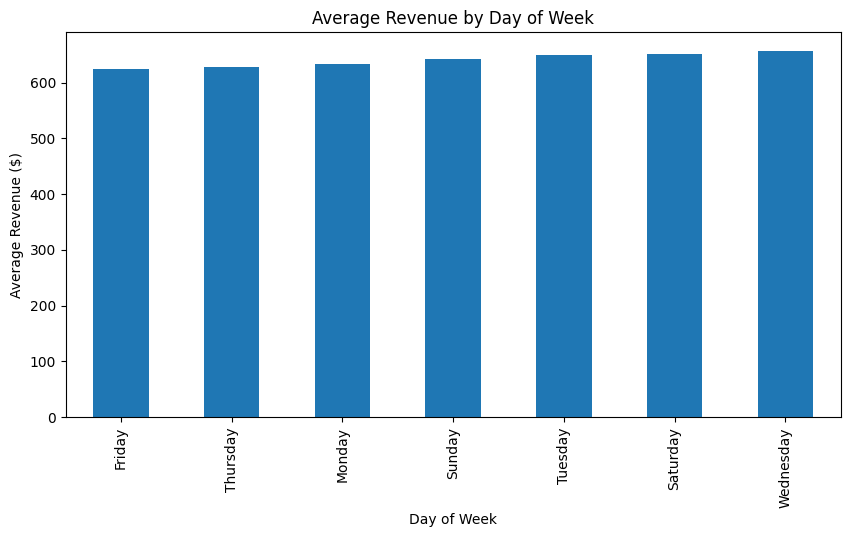

In [27]:
sales_data.groupby('Day')['Revenue'].mean().sort_values().plot(kind='bar', figsize=(10, 5))
plt.title('Average Revenue by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Revenue ($)')
plt.show()

The chart above is displaying the average revenue of a bike company by day of the week. It shows a stable pattern throughout the week, with relatively small fluctuations between the days. Despite this stability, there seems to be a clear standout day, with Wednesday being the most popular day for shopping at the bike company. This could be attributed to various factors, such as consumer behavior or special promotions offered on this day. On the other hand, Friday appears to be the least popular day for shopping, with the lowest average revenue. 

### Patterns in revenue by product category and sub category

Next, we analyzed the bike company's sales data, looking for patterns in revenue by product category and sub-category. The purpose of breaking down the sales data in this way was for us to gain a deeper understanding of which product types are performing well and which are underperforming. We could use this information to inform the company to help optimize revenue and drive growth. 

In [28]:
sales_data.groupby('Sub Category')['Revenue'].describe()

,count,mean,std,min,25%,50%,75%,max
Sub Category,,,,,,,,
Bike Racks,103.0,1367.514563,1275.993207,134.0,440.00,906.0,1936.50,5082.0
Bike Stands,145.0,1040.765517,532.682077,168.0,576.00,1041.0,1401.00,2153.0
Bottles and Cages,5295.0,133.976771,92.144324,4.0,61.00,119.0,183.00,465.0
Caps,1517.0,168.748846,96.037527,8.0,88.00,169.0,245.00,478.0
Cleaners,545.0,152.086239,83.132568,8.0,85.00,155.0,214.00,367.0
Fenders,762.0,432.026247,250.349499,19.0,210.25,429.0,646.00,1078.0
Gloves,480.0,475.735417,281.083177,24.0,235.75,467.5,715.25,1256.0
Helmets,4176.0,655.701628,386.717810,28.0,326.75,639.0,962.25,1826.0
Hydration Packs,396.0,1018.373737,589.586555,48.0,528.75,1011.0,1481.75,2555.0


The sub category summary statistics allowed us to gain insights into the most and least popular products, based on the quantity sold. The results revealed that 'tires and tubes', 'bottles and cages', and 'helmets' were the top three most popular items by quantity. On the other hand, 'bike racks', 'bike stands', and 'vests' were the least popular items. To visualize this information, we created a bar graph that clearly displays the quantity sold by each sub-category.

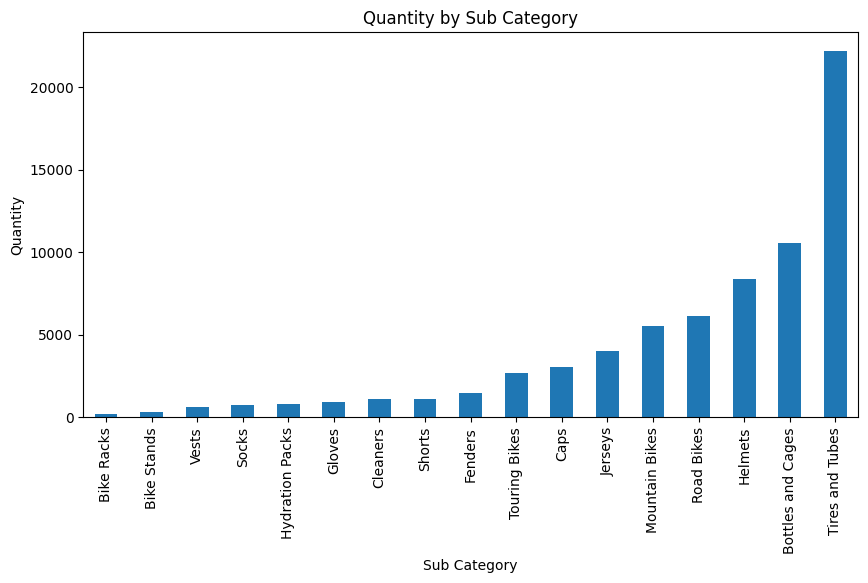

In [29]:
sales_data.groupby('Sub Category')['Quantity'].sum().sort_values().plot(kind='bar', figsize=(10, 5))
plt.title('Quantity by Sub Category')
plt.xlabel('Sub Category')
plt.ylabel('Quantity')
plt.show()

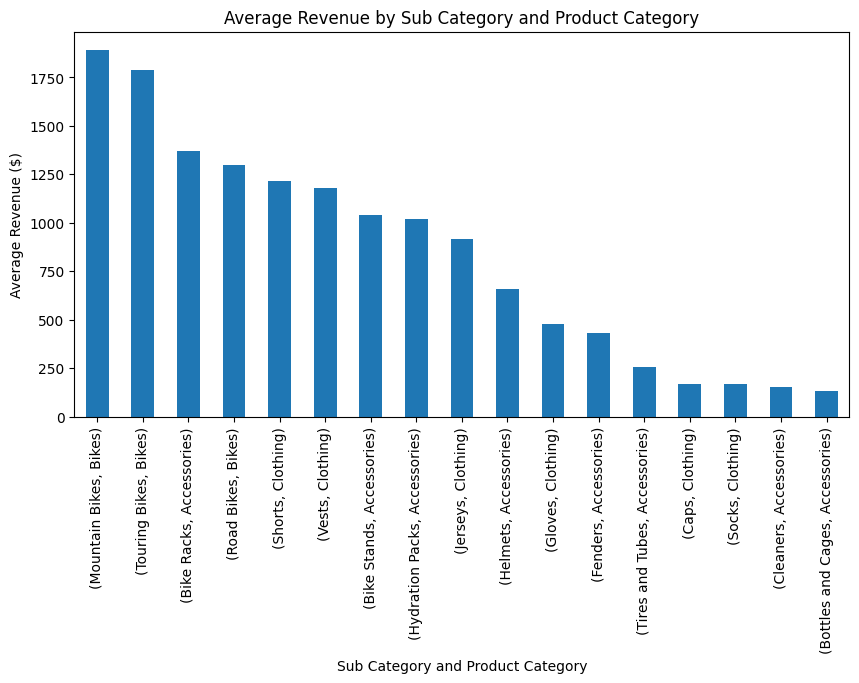

In [30]:
sales_data.groupby(['Sub Category', 'Product Category'])['Revenue'].mean().sort_values(ascending=False).plot(kind='bar', figsize=(10, 5))
plt.title('Average Revenue by Sub Category and Product Category')
plt.xlabel('Sub Category and Product Category')
plt.ylabel('Average Revenue ($)')
plt.show()

However, when we looked at the sub categories by revenue, the results were somewhat different from what we saw in terms of quantity sold. Despite having low sales, 'bike racks' surprisingly made it into the top three for highest revenue, along with 'mountain bikes' and 'touring bikes.' On the other hand, 'bottles and cages,' 'cleaners,' and 'socks' generated the least revenue for the company. This information highlights the importance of considering both quantity sold and revenue when making decisions about product offerings, as products with lower sales can still generate significant revenue for the company. 

C:\Users\annco\AppData\Local\Temp\ipykernel_15508\1386671824.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sales_data.groupby('Sub Category')['Revenue', 'Cost'].mean().plot(kind='bar', figsize=(10, 5))


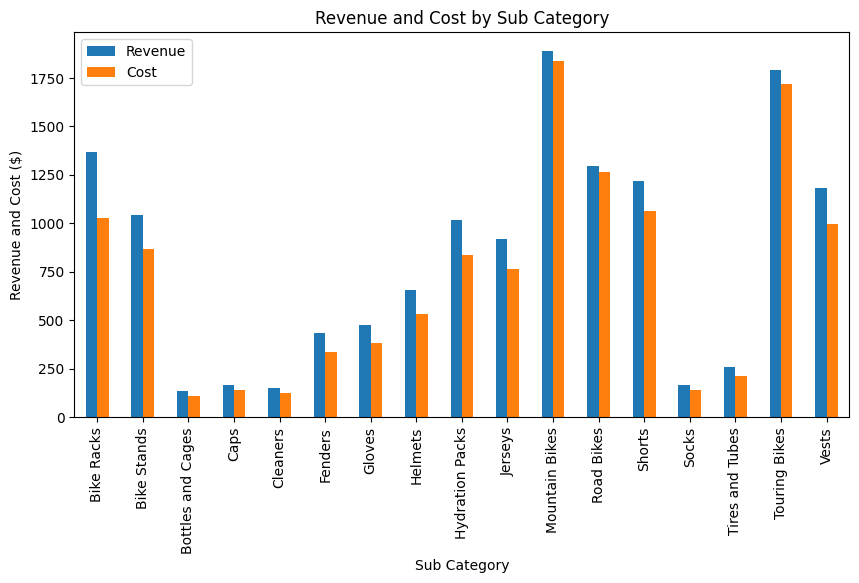

In [31]:
sales_data.groupby('Sub Category')['Revenue', 'Cost'].mean().plot(kind='bar', figsize=(10, 5))
plt.title('Revenue and Cost by Sub Category')
plt.xlabel('Sub Category')
plt.ylabel('Revenue and Cost ($)')
plt.show()

We then took the next step and compared the revenue to costs for each item, as seen in the chart above. Some items, such as 'mountain bikes,' have very high costs that are almost as much as their revenue, which led us to investigate the profit margin for each item. To do this, we created a new column in the sales data called 'Profit Margin,' which subtracted the cost from revenue and divided the result by the revenue. This allowed us to see the profit margin for each product type, providing valuable insights into which products are generating the most profit for the company.

In [32]:
sales_data['Profit Margin'] = (sales_data['Revenue'] - sales_data['Cost']) / sales_data['Revenue']

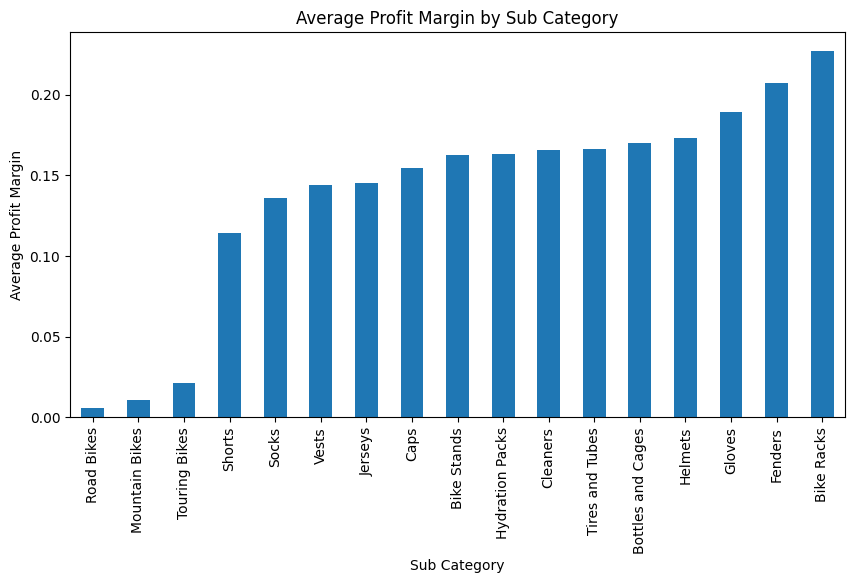

In [33]:
sales_data.groupby('Sub Category')['Profit Margin'].mean().sort_values().plot(kind='bar', figsize=(10, 5))
plt.title('Average Profit Margin by Sub Category')
plt.xlabel('Sub Category')
plt.ylabel('Average Profit Margin')
plt.show()

This chart shows the average profit margin for each sub-category of products. The x-axis represents the different sub-categories, while the y-axis shows the average profit margin. The chart is presented as a bar plot, with each bar representing a sub-category. The bars are sorted in ascending order by their average profit margin. This chart can be useful for identifying which sub-categories of products have the highest and lowest profit margins. In this case, "bike racks", "fenders", and "gloves" had the highest profit margin, while "road bikes", "mountain bikes", and "touring bikes" had the lowest.

### Patterns in revenue by geographic location

We then looked at the sales data to get some insights into the company's revenue and profitability across various geographic locations. The purpose of this analysis was to gain a better understanding of the company's performance in different regions and identify any patterns or trends that could inform future business decisions. 

In [34]:
sales_data['Country'].value_counts(normalize=True)

United States     0.518442
United Kingdom    0.184162
Germany           0.149171
France            0.148225
Name: Country, dtype: float64

This data shows the proportion of sales data that is attributed to each country. The United States accounts for the majority of sales at 51.8%, followed by the United Kingdom at 18.4%, and Germany and France with approximately equal shares at 14.9% and 14.8% respectively.

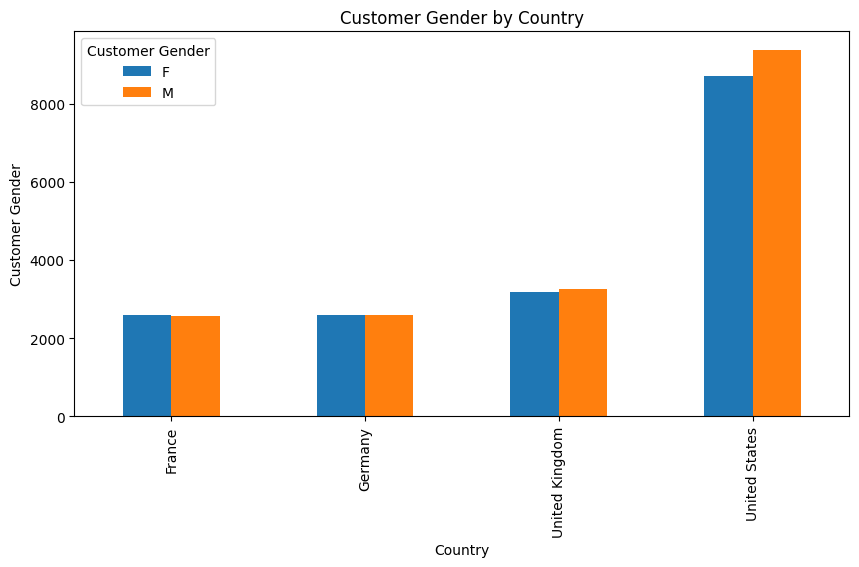

In [35]:
sales_data.groupby('Country')['Customer Gender'].value_counts().unstack().plot(kind='bar', figsize=(10, 5))
plt.title('Customer Gender by Country')
plt.xlabel('Country')
plt.ylabel('Customer Gender')
plt.show()

This chart shows the customer gender distribution by country in the sales data. The chart reveals that in the Germany and France, the number of male customers is slightly higher than female customers. However, in the United States and United Kingdom, the number of female customers is higher than male customers.

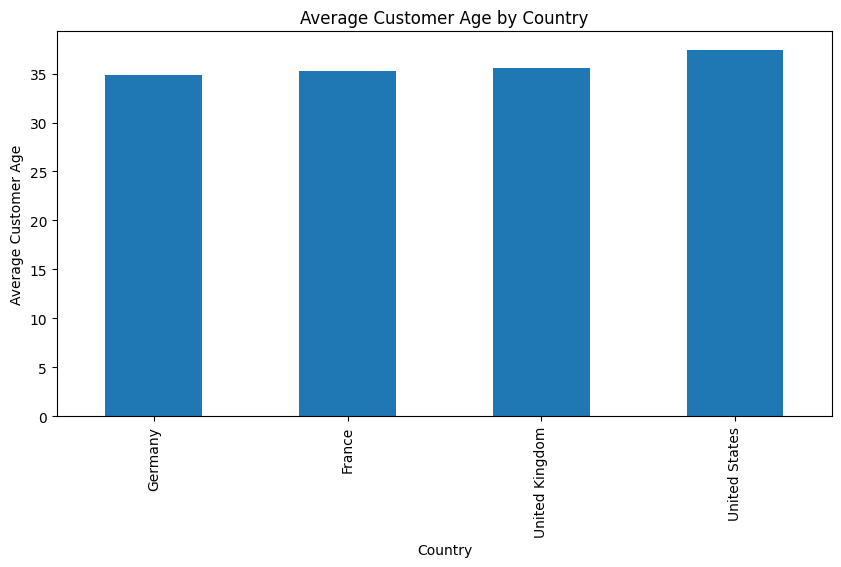

In [36]:
sales_data.groupby('Country')['Customer Age'].mean().sort_values().plot(kind='bar', figsize=(10, 5))
plt.title('Average Customer Age by Country')
plt.xlabel('Country')
plt.ylabel('Average Customer Age')
plt.show()

The bar plot shows the average customer age by country for the sales data of the bike company. It indicates that the average customer age is highest in United States and lowest in the Germany, with the United Kingdom and France in between.

In [37]:
sales_data.pivot_table(index='Country', values='Revenue', aggfunc='sum')

,Revenue
Country,
France,3446104.0
Germany,4244510.0
United Kingdom,4276220.0
United States,10377742.0


This is a pivot table that shows the total revenue for each country in the sales data. The index of the table is the country name and the values are the total revenue for that country. From the table, we can see that the United States has the highest total revenue, followed by the United Kingdom, Germany, and France.

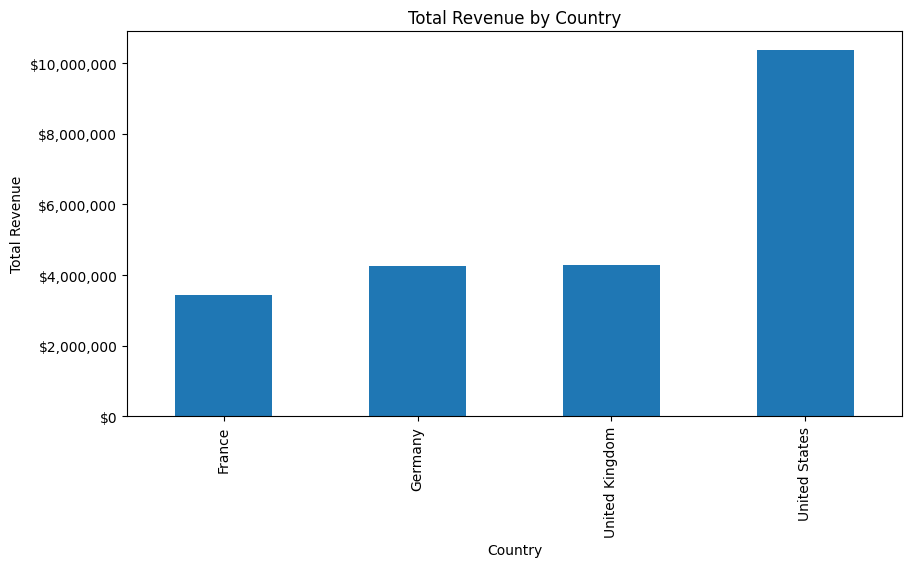

In [38]:
import matplotlib.ticker as ticker

ax = sales_data.groupby('Country')['Revenue'].sum().sort_values().plot(kind='bar', figsize=(10, 5))
ax.set_title('Total Revenue by Country')
ax.set_xlabel('Country')
ax.set_ylabel('Total Revenue')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '${:,.0f}'.format(x)))
plt.show()

This is a bar chart that shows the total revenue for each country in the sales data set. The countries are listed on the x-axis, and the total revenue is on the y-axis. The bar for each country represents the total revenue for that country. The chart shows that the United States had the highest total revenue, followed by the United Kingdom, Germany, and France.

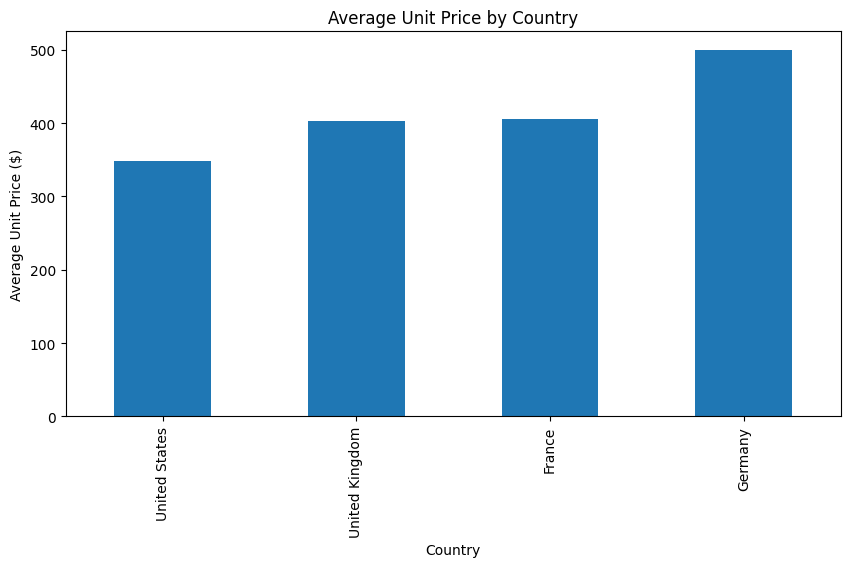

In [39]:
sales_data.groupby('Country')['Unit Price'].mean().sort_values().plot(kind='bar', figsize=(10, 5))
plt.title('Average Unit Price by Country')
plt.xlabel('Country')
plt.ylabel('Average Unit Price ($)')
plt.show()

This chart shows the average unit price of products sold in each country. The x-axis shows the different countries, while the y-axis shows the average unit price in dollars. The Germany has the highest average unit price, followed by the France, United Kingdom, and the United States.

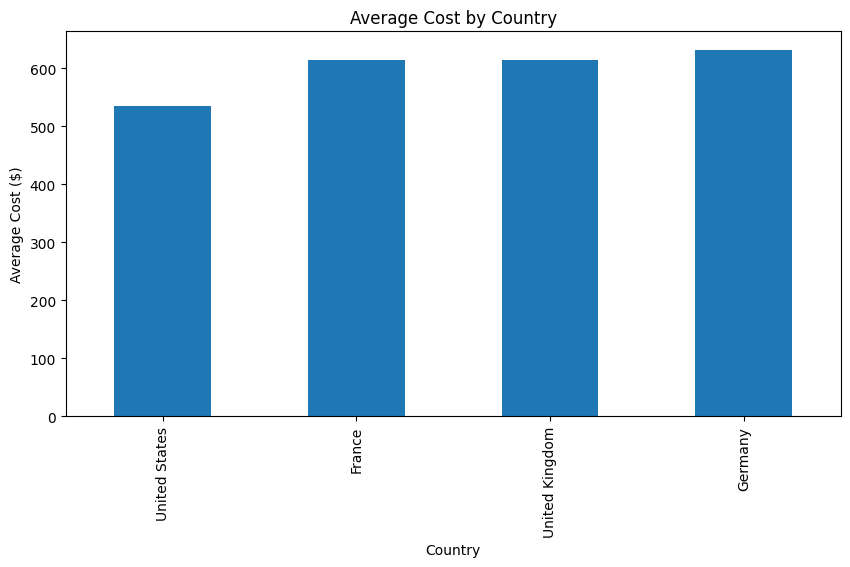

In [40]:
sales_data.groupby('Country')['Cost'].mean().sort_values().plot(kind='bar', figsize=(10, 5))
plt.title('Average Cost by Country')
plt.xlabel('Country')
plt.ylabel('Average Cost ($)')
plt.show()

This chart shows the average cost of products sold in each of the four countries included in the sales data. The x-axis represents the country, and the y-axis represents the average cost of the products. We can see that the average cost of products sold is the highest in Germany, followed by the United Kingdom, France, and the United States with the lowest average cost.

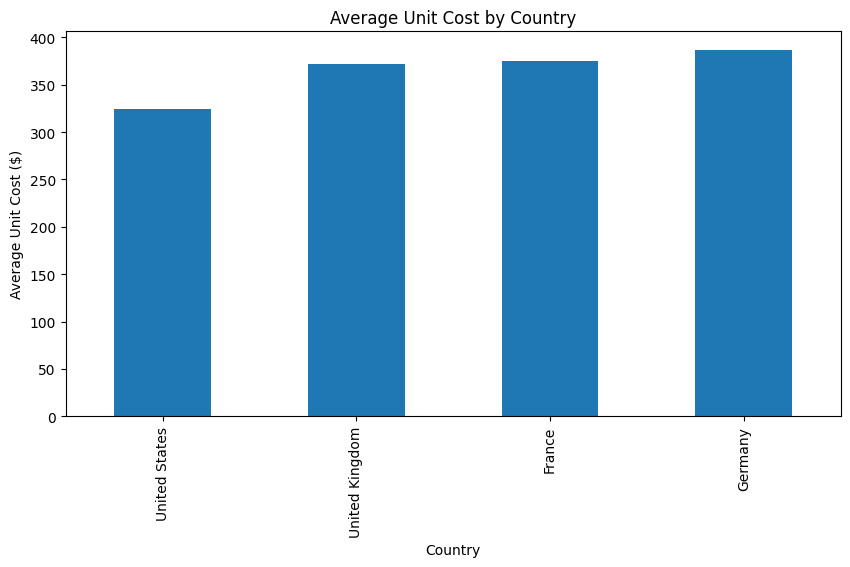

In [41]:
sales_data.groupby('Country')['Unit Cost'].mean().sort_values().plot(kind='bar', figsize=(10, 5))
plt.title('Average Unit Cost by Country')
plt.xlabel('Country')
plt.ylabel('Average Unit Cost ($)')
plt.show()

This chart shows the average unit cost of products in each country. The plot suggests that the average unit cost is relatively consistent across all four countries, with United States having the lowest unit cost and the Germany having the highest.

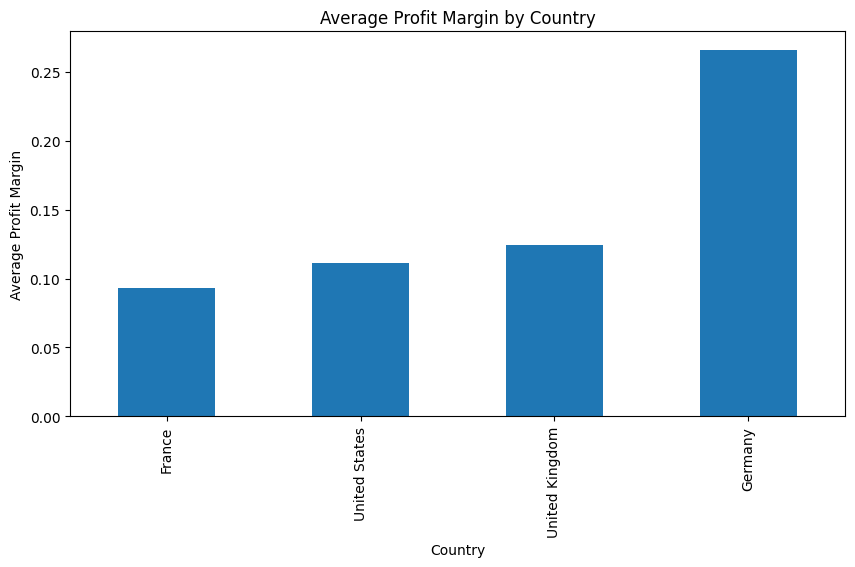

In [42]:
sales_data.groupby('Country')['Profit Margin'].mean().sort_values().plot(kind='bar', figsize=(10, 5))
plt.title('Average Profit Margin by Country')
plt.xlabel('Country')
plt.ylabel('Average Profit Margin')
plt.show()

This chart shows the average profit margin by country for the sales data. The x-axis represents the countries and the y-axis represents the average profit margin. The chart is useful in comparing the profitability of the different countries.

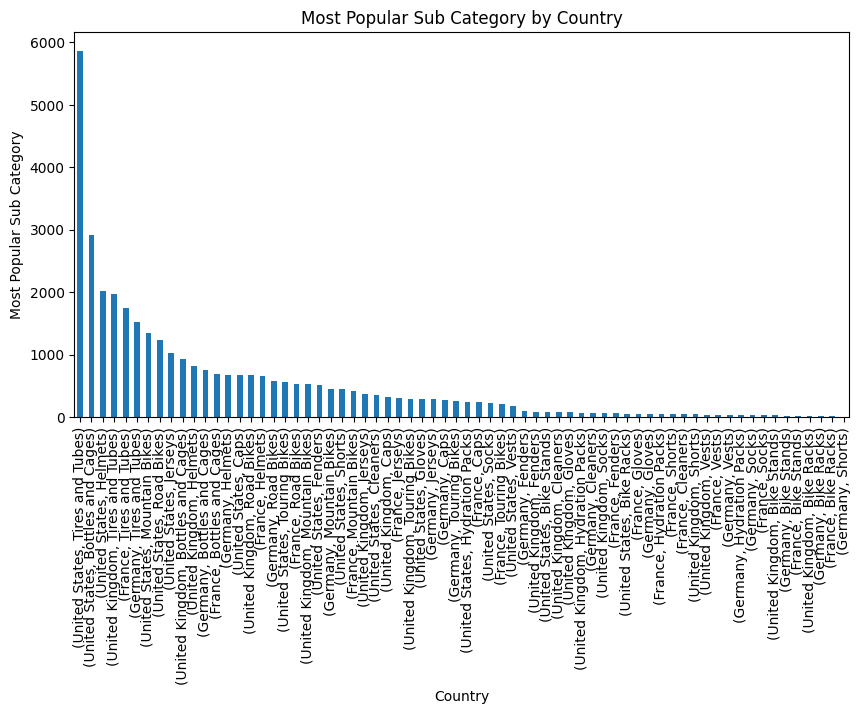

In [43]:
sales_data.groupby('Country')['Sub Category'].value_counts().sort_values(ascending=False).plot(kind='bar', figsize=(10, 5))
plt.title('Most Popular Sub Category by Country')
plt.xlabel('Country')
plt.ylabel('Most Popular Sub Category')
plt.show()

This chart displays the most popular sub category for each country in the sales data.

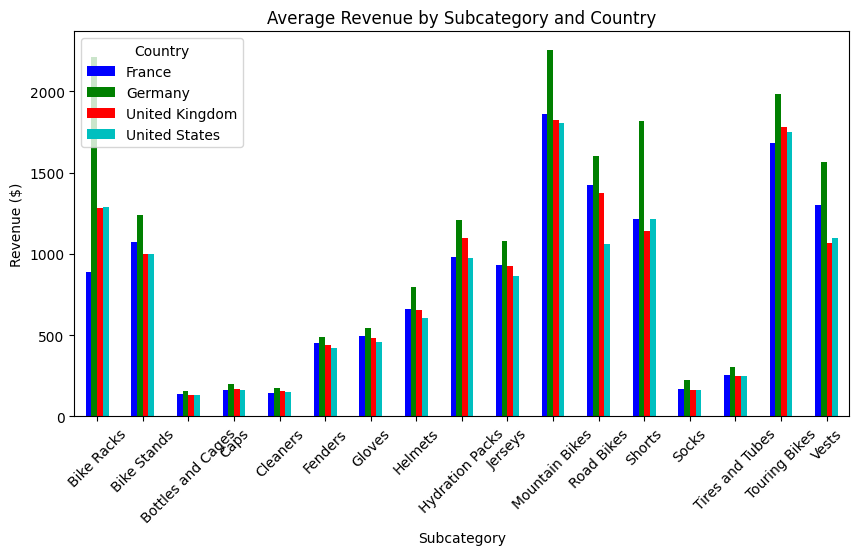

In [44]:
pivot_table = pd.pivot_table(sales_data, values='Revenue', index='Sub Category', columns='Country', aggfunc=np.mean)

colors = ['b', 'g', 'r', 'c']
pivot_table.plot.bar(stacked=False, color=colors, figsize=(10,5))
plt.title('Average Revenue by Subcategory and Country')
plt.xlabel('Subcategory')
plt.ylabel('Revenue ($)')
plt.xticks(rotation=45)

plt.legend(title='Country', loc='upper left')

plt.show()

The chart shows the average revenue by subcategory for four different countries - United States, Germany, United Kingdom, and France. The revenue for each subcategory is represented by a different color. It can be seen that for each country, the average revenue for each subcategory varies. For example, in the United States, the subcategory with the highest average revenue is Mountain Bikes, while the lowest is bike stands. In general, bikes have the highest average revenue across all four countries.

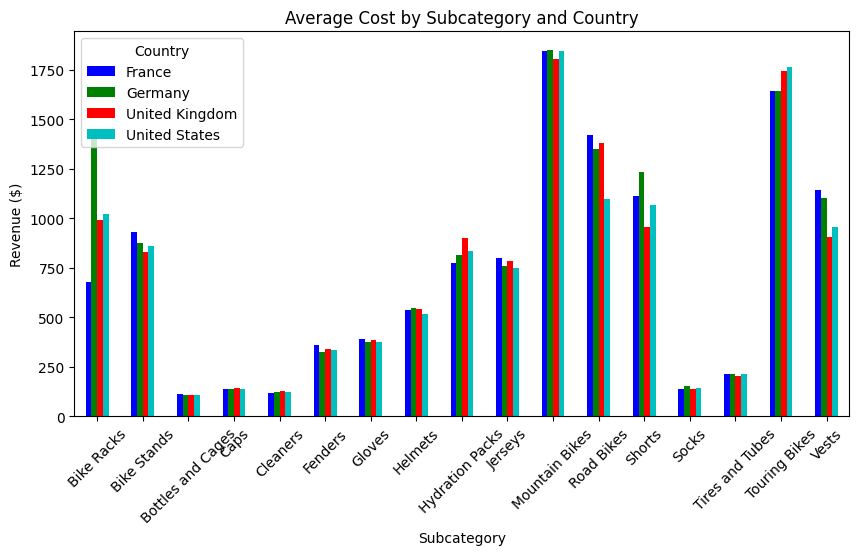

In [45]:
pivot_table = pd.pivot_table(sales_data, values='Cost', index='Sub Category', columns='Country', aggfunc=np.mean)

colors = ['b', 'g', 'r', 'c']
pivot_table.plot.bar(stacked=False, color=colors, figsize=(10,5))
plt.title('Average Cost by Subcategory and Country')
plt.xlabel('Subcategory')
plt.ylabel('Revenue ($)')
plt.xticks(rotation=45)

plt.legend(title='Country', loc='upper left')

plt.show()

We created a pivot table of the average cost by subcategory and country, then ploted a stacked bar chart of the data. Each country is represented by a different color. The chart provides insight into the cost of each subcategory in different countries, with the Germany having the highest cost for most subcategories.

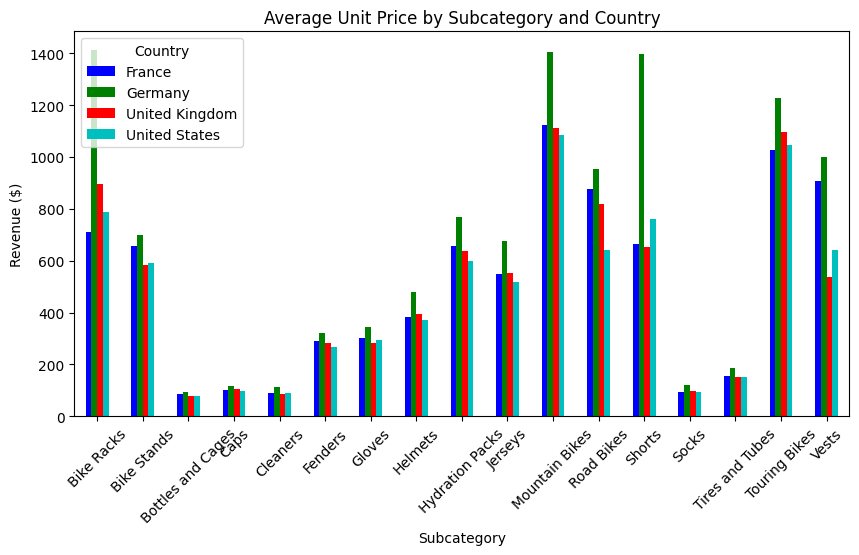

In [46]:
pivot_table = pd.pivot_table(sales_data, values='Unit Price', index='Sub Category', columns='Country', aggfunc=np.mean)

colors = ['b', 'g', 'r', 'c']
pivot_table.plot.bar(stacked=False, color=colors, figsize=(10,5))
plt.title('Average Unit Price by Subcategory and Country')
plt.xlabel('Subcategory')
plt.ylabel('Revenue ($)')
plt.xticks(rotation=45)

plt.legend(title='Country', loc='upper left')

plt.show()

This chart displays the average unit price of products by subcategory and country. The data has been pivoted to create a table of mean unit price for each subcategory in each country. The resulting stacked bar chart shows the mean unit price for each subcategory by country with a different color for each country. The chart helps to visualize the differences in the average unit price across countries and subcategories.

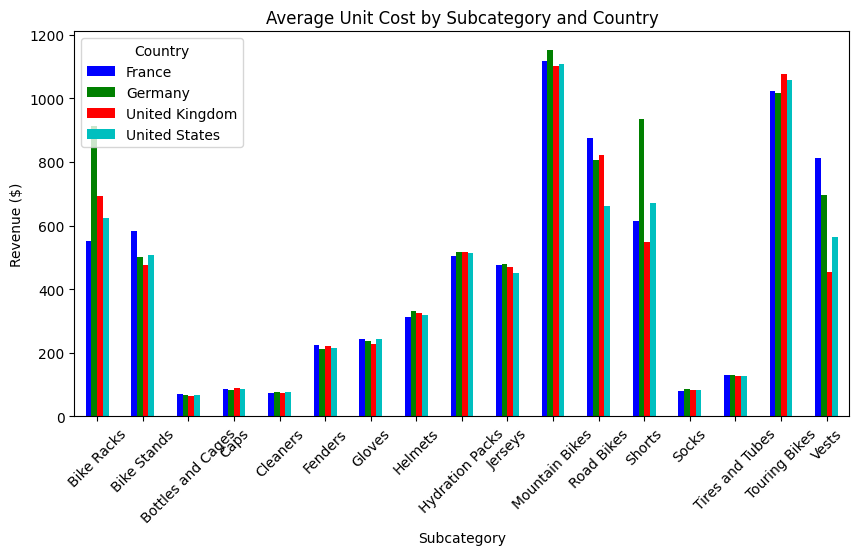

In [47]:
pivot_table = pd.pivot_table(sales_data, values='Unit Cost', index='Sub Category', columns='Country', aggfunc=np.mean)

colors = ['b', 'g', 'r', 'c']
pivot_table.plot.bar(stacked=False, color=colors, figsize=(10,5))
plt.title('Average Unit Cost by Subcategory and Country')
plt.xlabel('Subcategory')
plt.ylabel('Revenue ($)')
plt.xticks(rotation=45)

plt.legend(title='Country', loc='upper left')

plt.show()

The chart shows the average unit cost by subcategory and country for a bike company's sales data. The chart is a stacked bar chart with each subcategory represented by a different color. The chart shows that the average unit cost is highest for the Germany than the rest.

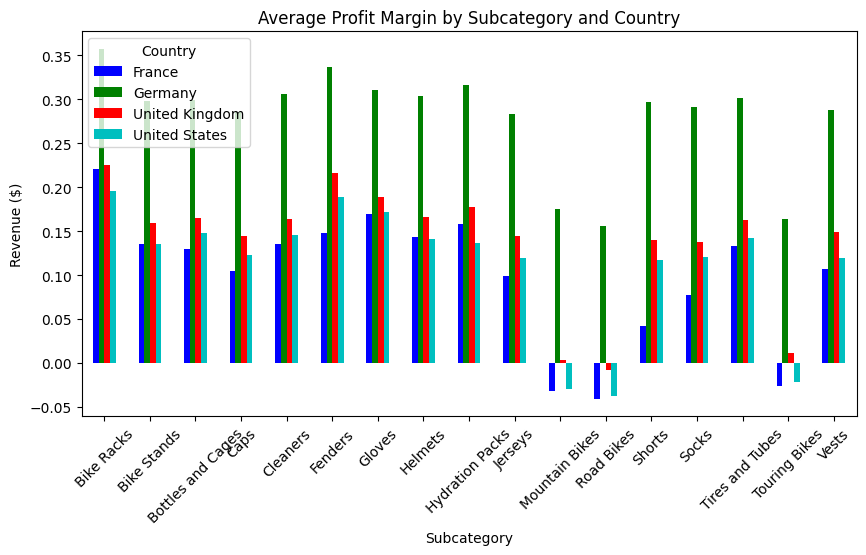

In [48]:
pivot_table = pd.pivot_table(sales_data, values='Profit Margin', index='Sub Category', columns='Country', aggfunc=np.mean)

colors = ['b', 'g', 'r', 'c']
pivot_table.plot.bar(stacked=False, color=colors, figsize=(10,5))
plt.title('Average Profit Margin by Subcategory and Country')
plt.xlabel('Subcategory')
plt.ylabel('Revenue ($)')
plt.xticks(rotation=45)

plt.legend(title='Country', loc='upper left')

plt.show()

This chart shows the average profit margin by subcategory and country. A pivot table is created using the sales data to calculate the mean profit margin for each subcategory and country. The pivot table is then used to create a stacked bar chart where each subcategory is represented by a bar and each country is represented by a different color. The chart shows that the average profit margin is highest for Germany and lowest for the France. 

California, England (UK), Washington, and Oregon were the states with the most revenue.

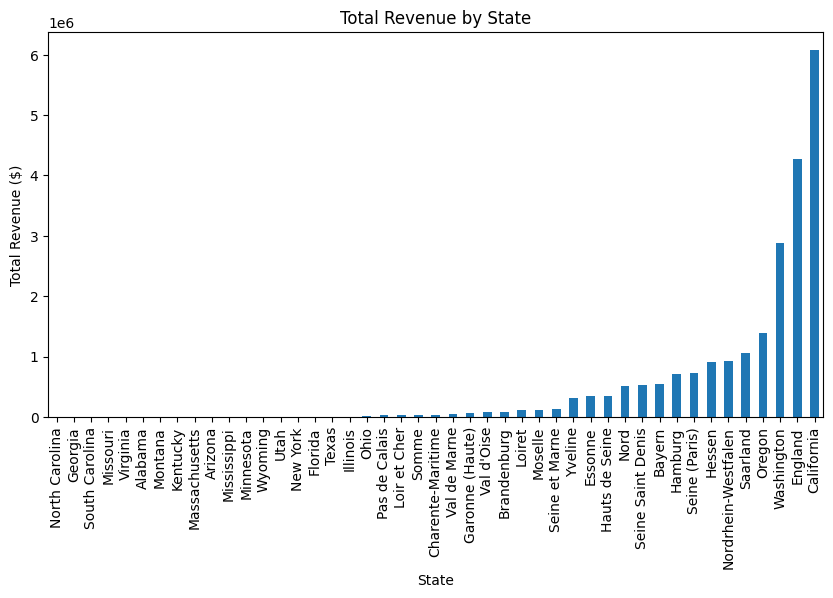

In [49]:
sales_data.groupby('State')['Revenue'].sum().sort_values().plot(kind='bar', figsize=(10, 5))
plt.title('Total Revenue by State')
plt.xlabel('State')
plt.ylabel('Total Revenue ($)')
plt.show()

Massachusetts and Arizona both had the highest costs of any state desipte have very low revenue. They also had the smallest profit margin out of any state either.

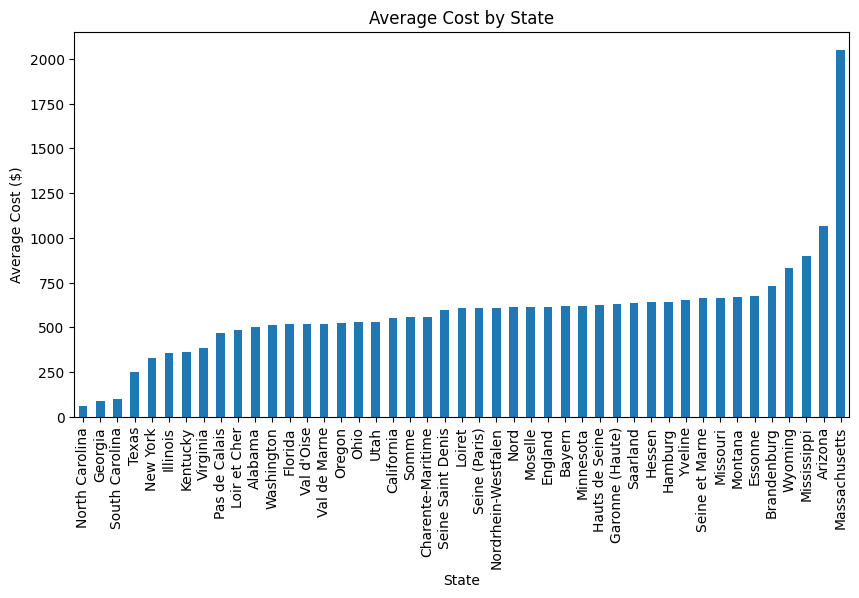

In [50]:
sales_data.groupby('State')['Cost'].mean().sort_values().plot(kind='bar', figsize=(10, 5))
plt.title('Average Cost by State')
plt.xlabel('State')
plt.ylabel('Average Cost ($)')
plt.show()

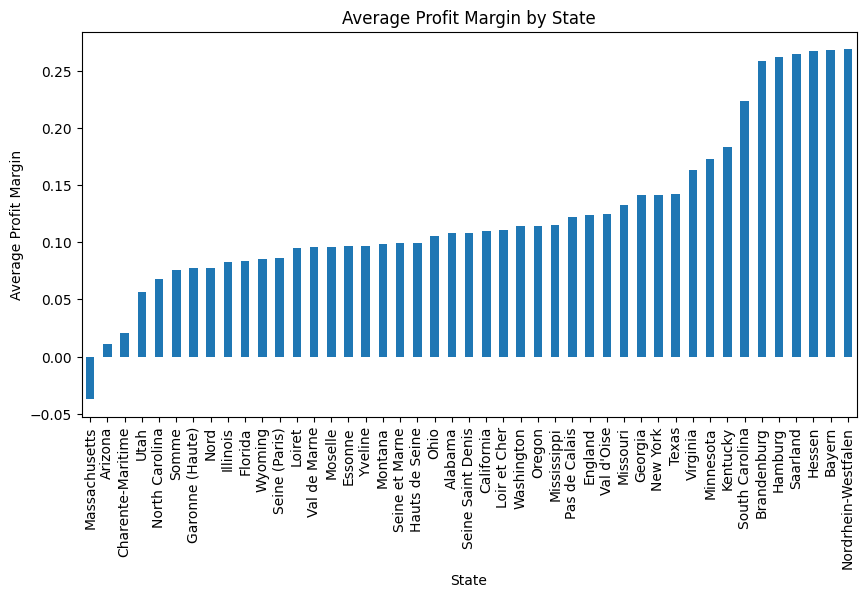

In [51]:
sales_data.groupby('State')['Profit Margin'].mean().sort_values().plot(kind='bar', figsize=(10, 5))
plt.title('Average Profit Margin by State')
plt.xlabel('State')
plt.ylabel('Average Profit Margin')
plt.show()

### Patterns in revenue by customer demographic

The sales dataset contains information on customer demographic. We are using this data to explore patterns in revenue by customer demographic, such as age and gender, and to identify which customer segments generate the highest revenue.

In [52]:
sales_data['Customer Age'].describe()

count    34866.000000
mean        36.382895
std         11.112902
min         17.000000
25%         28.000000
50%         35.000000
75%         44.000000
max         87.000000
Name: Customer Age, dtype: float64

In [53]:
sales_data['Customer Age'].median()

35.0

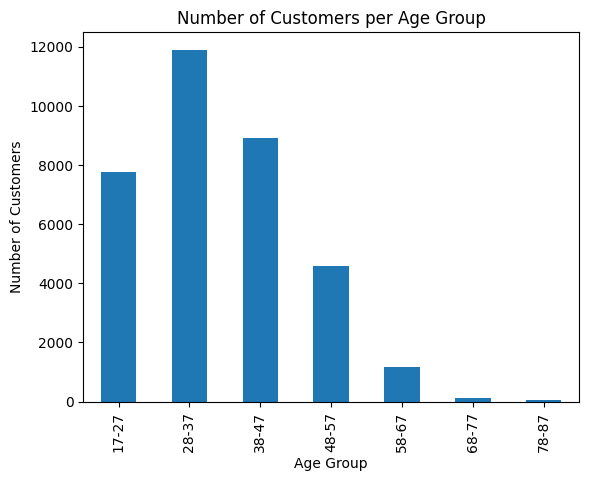

In [54]:
sales_data['Customer Age Group'] = pd.cut(sales_data['Customer Age'], bins=[17, 27, 37, 47, 57, 67, 77, 87], labels=['17-27', '28-37', '38-47', '48-57', '58-67', '68-77', '78-87'])
sales_data['Customer Age Group'].value_counts().sort_index().plot(kind='bar')
plt.title('Number of Customers per Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.show()

 The above bar chart gives insight into the distribution of customers by age. This chart shows the number of customers in each age group, which is calculated by grouping customer ages into seven age ranges. The age groups range from 17 to 87, with each group covering a 10-year range. The chart shows that the majority of customers are between the ages of 28 and 47, with the largest group being between the ages of 28 and 47. The chart also shows that the number of customers decreases as the age increases.

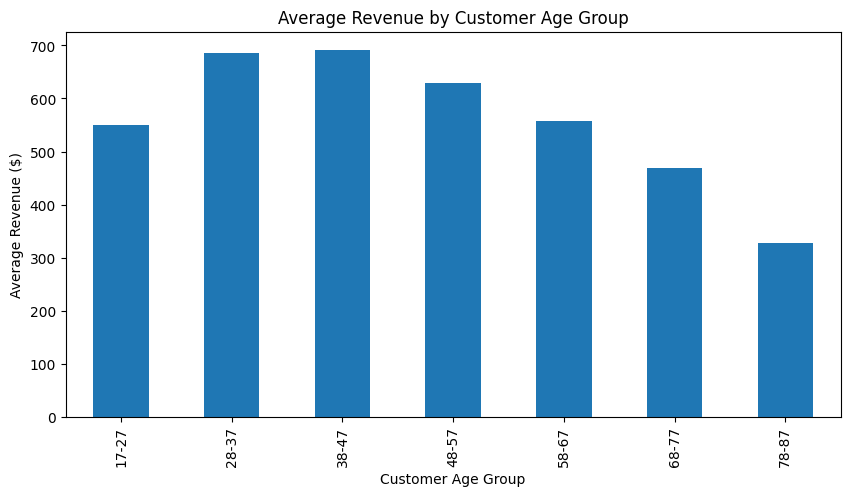

In [55]:
sales_data.groupby('Customer Age Group')['Revenue'].mean().plot(kind='bar', figsize=(10, 5))
plt.title('Average Revenue by Customer Age Group')
plt.xlabel('Customer Age Group')
plt.ylabel('Average Revenue ($)')
plt.show()

The chart above shows the average revenue by customer age group. The chart shows the average revenue for each age group, which ages 38 to 47 having the highest average revenue. The chart also shows that the average revenue decreases as the age increases.

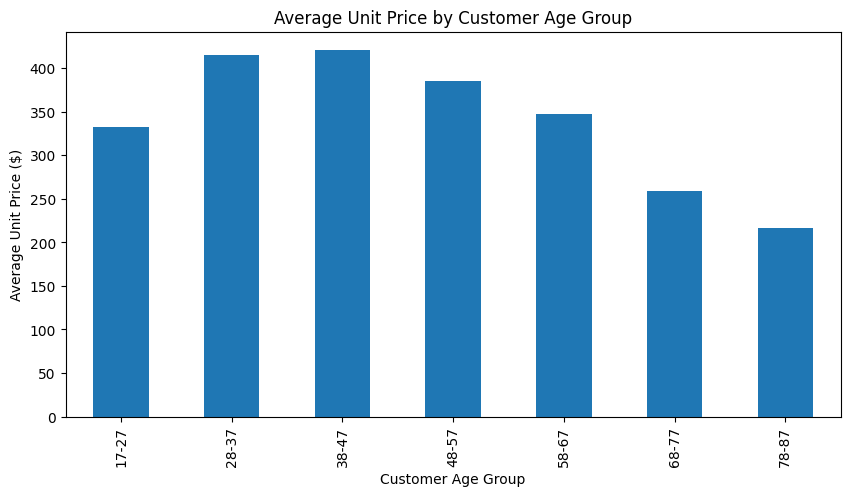

In [56]:
sales_data.groupby('Customer Age Group')['Unit Price'].mean().plot(kind='bar', figsize=(10, 5))
plt.title('Average Unit Price by Customer Age Group')
plt.xlabel('Customer Age Group')
plt.ylabel('Average Unit Price ($)')
plt.show()

This chart shows the average unit price by customer age group. Age group 38 to 47 has the highest average unit price, while age group 78 to 87 has the lowest average unit price. The chart also shows that the average unit price decreases as the age increases.

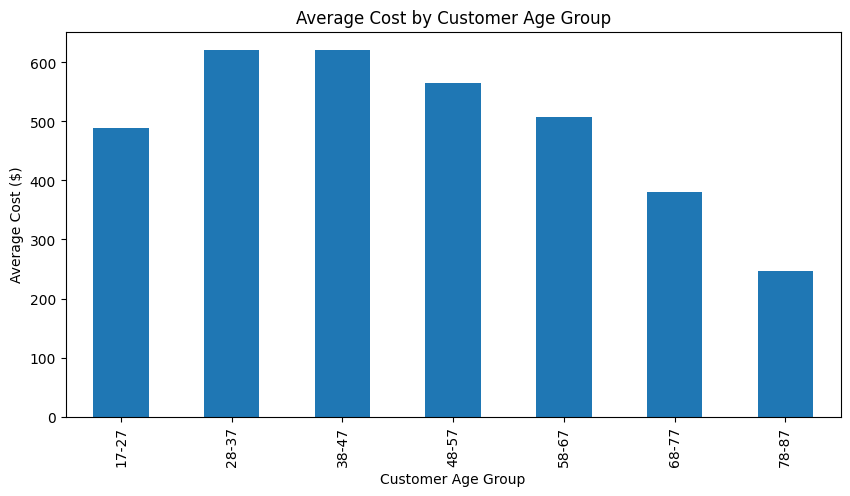

In [57]:
sales_data.groupby('Customer Age Group')['Cost'].mean().plot(kind='bar', figsize=(10, 5))
plt.title('Average Cost by Customer Age Group')
plt.xlabel('Customer Age Group')
plt.ylabel('Average Cost ($)')
plt.show()

The chart shows the average cost by customer age group. It helps to identify if there is any correlation between customer age group and the cost of products.

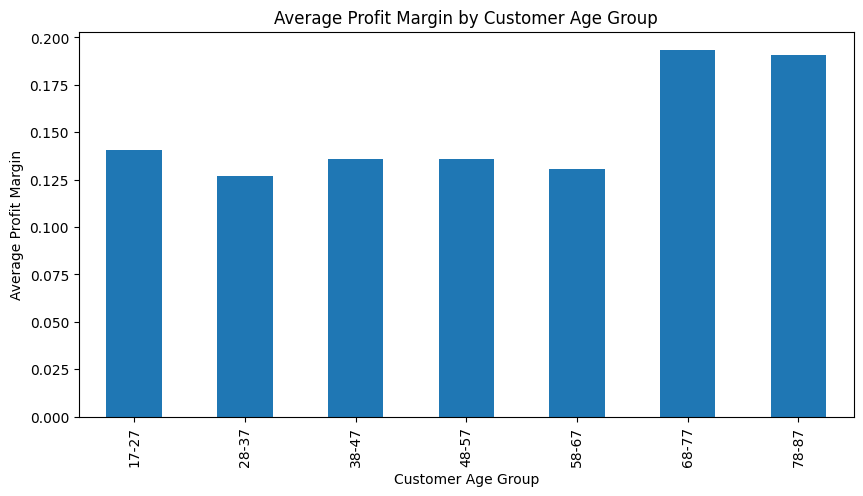

In [58]:
sales_data.groupby('Customer Age Group')['Profit Margin'].mean().plot(kind='bar', figsize=(10, 5))
plt.title('Average Profit Margin by Customer Age Group')
plt.xlabel('Customer Age Group')
plt.ylabel('Average Profit Margin')
plt.show()

This data shows the average profit margin by customer age group in the bike company's sales data. The data is grouped by customer age group and plotted as a bar chart. The chart shows that the average profit margin is highest for age group 28 to 37 and lowest for age group 68 to 77. The chart also shows that the average profit margin stays flat for most age groups until it increases for age groups above 67.

In [59]:
sales_data.groupby(['Customer Age Group', 'Sub Category'])['Revenue'].sum().groupby(level=0).nlargest(3)

Customer Age Group  Customer Age Group  Sub Category   
17-27               17-27               Mountain Bikes      873047.0
                                        Road Bikes          718922.0
                                        Tires and Tubes     648923.0
28-37               28-37               Mountain Bikes     1887851.0
                                        Road Bikes         1743495.0
                                        Helmets             952385.0
38-47               38-47               Mountain Bikes     1554510.0
                                        Road Bikes          967783.0
                                        Touring Bikes       790354.0
48-57               48-57               Mountain Bikes      677408.0
                                        Tires and Tubes     422680.0
                                        Road Bikes          419963.0
58-67               58-67               Mountain Bikes      171331.0
                                        Tires a

The data shows the total revenue generated by the top three subcategories for each age group. The age groups are divided into 7 categories ranging from 17-87, and the revenue generated is for the subcategories of Mountain Bikes, Road Bikes, Tires and Tubes, Helmets, and Touring Bikes. The revenue is grouped by age group and then sorted by the total revenue generated by the top three subcategories. The highest revenue generating subcategories vary by age group, with Mountain Bikes being the top revenue generator for the age groups 17-27, 28-37, 38-47, and 48-57. Tires and Tubes and Helmets were among the top three revenue generators for almost all age groups.

In [60]:
sales_data.groupby(['Customer Age Group', 'Sub Category'])['Unit Price'].mean().groupby(level=0).nlargest(3)

Customer Age Group  Customer Age Group  Sub Category  
17-27               17-27               Mountain Bikes    1054.805611
                                        Touring Bikes      921.006667
                                        Bike Racks         817.320513
28-37               28-37               Mountain Bikes    1074.157827
                                        Touring Bikes     1038.864412
                                        Bike Racks         853.317708
38-47               38-47               Mountain Bikes    1252.835266
                                        Touring Bikes     1188.612917
                                        Bike Racks         861.561905
48-57               48-57               Touring Bikes     1309.750000
                                        Mountain Bikes    1267.537093
                                        Bike Racks        1202.644444
58-67               58-67               Mountain Bikes    1239.676587
                                   

This data shows the mean unit price of items for each customer age group and subcategory. The results are sorted by customer age group, with the top three highest unit prices listed for each age group. The data suggests that for most age groups, mountain bikes have the highest mean unit price. Touring bikes, bike racks, and helmets are also among the top three for several age groups. For the oldest age group (78-87), vests have the highest mean unit price, followed by bike stands and fenders.

In [61]:
sales_data['Customer Gender'].value_counts()

M    17805
F    17061
Name: Customer Gender, dtype: int64

The sales data shows that there were 17805 male customers and 17061 female customers.

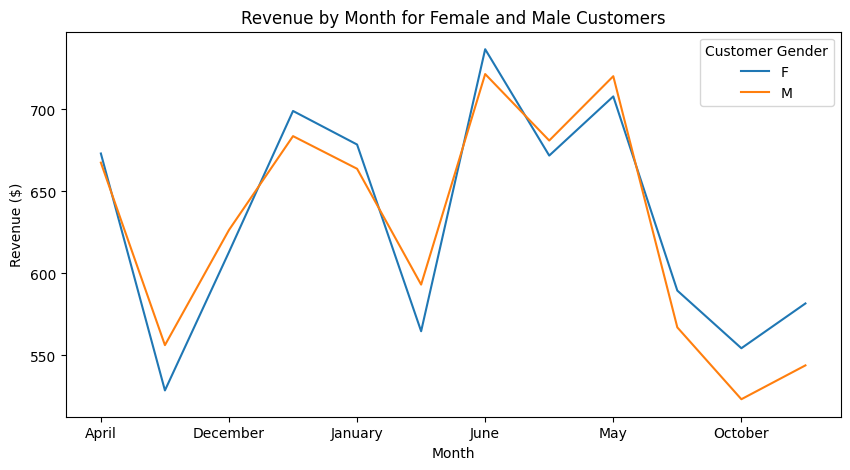

In [62]:
pivot = sales_data.pivot_table(index='Month', columns='Customer Gender', values='Revenue').reset_index()
pivot.plot(x='Month', figsize=(10, 5))
plt.title('Revenue by Month for Female and Male Customers')
plt.xlabel('Month')
plt.ylabel('Revenue ($)')
plt.show()

This chart shows the revenue by month for male and female customers of the bike company. The data is presented as a line plot, with separate lines for male and female revenue.

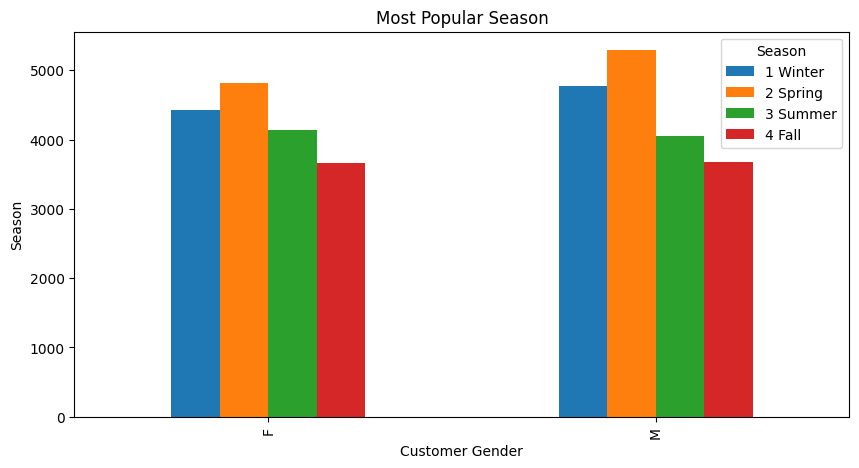

In [63]:
sales_data.groupby('Customer Gender')['Season'].value_counts().unstack().plot(kind='bar', figsize=(10, 5))
plt.title('Most Popular Season')
plt.xlabel('Customer Gender')
plt.ylabel('Season')
plt.show()

In [64]:
sales_data.groupby('Customer Gender')['Cost'].mean()

Customer Gender
F    576.418967
M    575.607414
Name: Cost, dtype: float64

We calculated the average cost for each gender category (F and M) from the sales data. The average cost for females is 576.42 and for males is 575.61.

### Patterns in revenue by unit price

Unit price is a crucial element in pricing optimization as it directly impacts the revenue generated by the company. The analysis began by examining the unit price for each subcategory. The results revealed that the majority of products sold were priced under $300. To further validate this observation, a histogram was created to illustrate the distribution of unit prices.

In [65]:
sales_data.pivot_table(index='Sub Category', values='Unit Price', aggfunc='mean')

,Unit Price
Sub Category,
Bike Racks,885.839806
Bike Stands,612.243678
Bottles and Cages,81.944319
Caps,104.151395
Cleaners,92.452294
Fenders,276.916885
Gloves,299.732986
Helmets,395.600655
Hydration Packs,630.190236


The table shows the mean unit price of each subcategory in the sales data. Bike racks have the highest mean unit price, while bottles and cages have the lowest mean unit price.

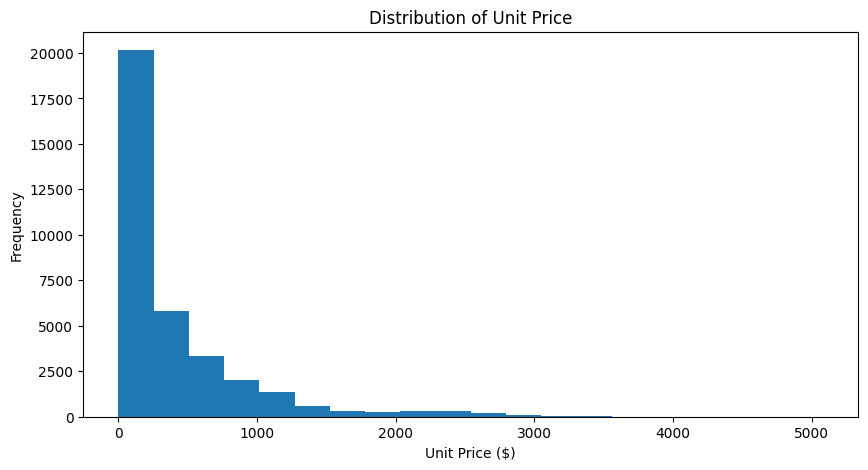

In [66]:
sales_data['Unit Price'].plot(kind='hist', bins=20, figsize=(10, 5))
plt.title('Distribution of Unit Price')
plt.xlabel('Unit Price ($)')
plt.ylabel('Frequency')
plt.show()

The histogram shows the distribution of unit prices in the sales data. The histogram is skewed to the right, indicating that the majority of unit prices are lower, with a long tail of higher-priced items.

To gain a deeper understanding of the pricing strategy for each category, a bar graph was created to illustrate the average unit price for each category. The visualization indicates that on average, bikes were the most expensive category, which may explain the high revenue generated from this category. In contrast, the average unit price for accessories was more varied, indicating that pricing for this category may be less consistent.

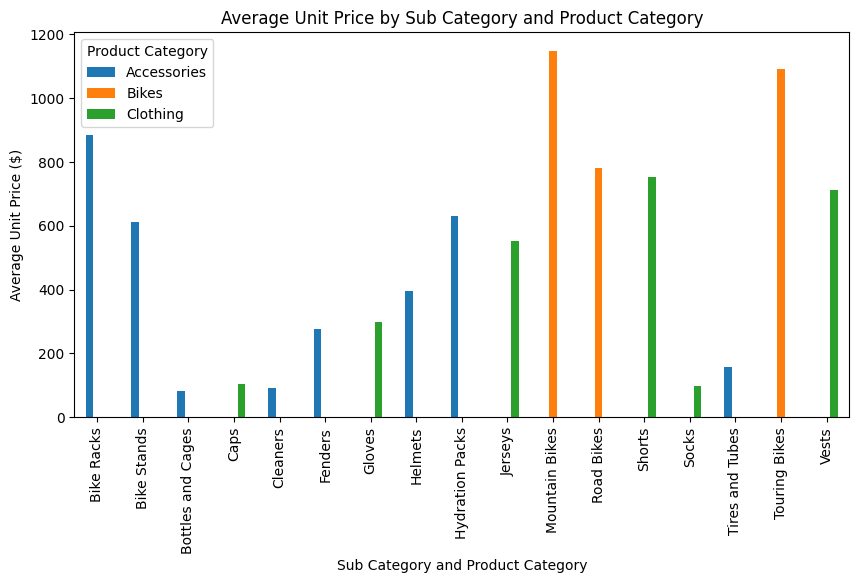

In [67]:
sales_data.groupby(['Sub Category', 'Product Category'])['Unit Price'].mean().unstack().plot(kind='bar', figsize=(10, 5))
plt.title('Average Unit Price by Sub Category and Product Category')
plt.xlabel('Sub Category and Product Category')
plt.ylabel('Average Unit Price ($)')
plt.show()

The scatterplot below illustrates the relationship between unit price and revenue for each product. The visualization reveals a strong correlation between the two variables. However, at this point, further analysis would be necessary to determine if increasing prices would result in higher revenue.

C:\Users\annco\AppData\Local\Temp\ipykernel_15508\1079431919.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sales_data.groupby('Sub Category')['Unit Price', 'Revenue'].mean().plot(kind='scatter', x='Unit Price', y='Revenue', figsize=(10, 5))


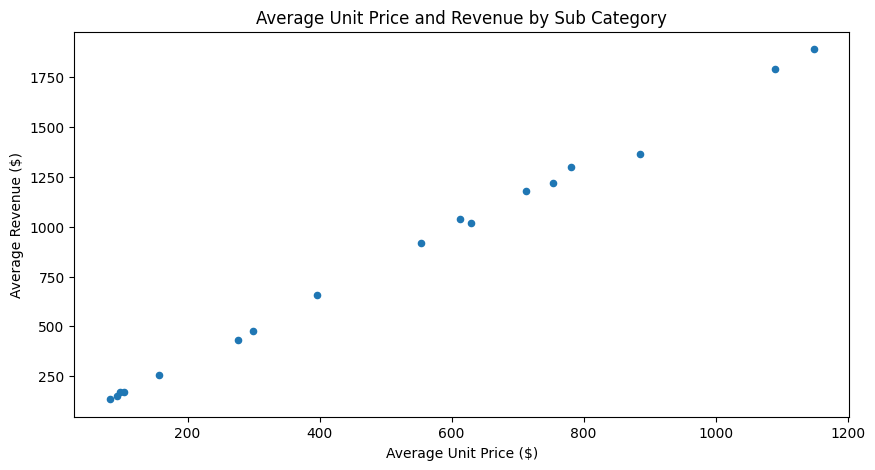

In [68]:
sales_data.groupby('Sub Category')['Unit Price', 'Revenue'].mean().plot(kind='scatter', x='Unit Price', y='Revenue', figsize=(10, 5))
plt.title('Average Unit Price and Revenue by Sub Category')
plt.xlabel('Average Unit Price ($)')
plt.ylabel('Average Revenue ($)')
plt.show()

However, it appears that there is no correlation between unit price and quantity sold for each product, as shown in the scatterplot . This suggests that increasing or decreasing the unit price may not affect the quantity of products sold, hence it's not a determinant factor on the quantity sold.

C:\Users\annco\AppData\Local\Temp\ipykernel_15508\2868915750.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sales_data.groupby('Sub Category')['Unit Price', 'Quantity'].mean().plot(kind='scatter', x='Unit Price', y='Quantity', figsize=(10, 5))


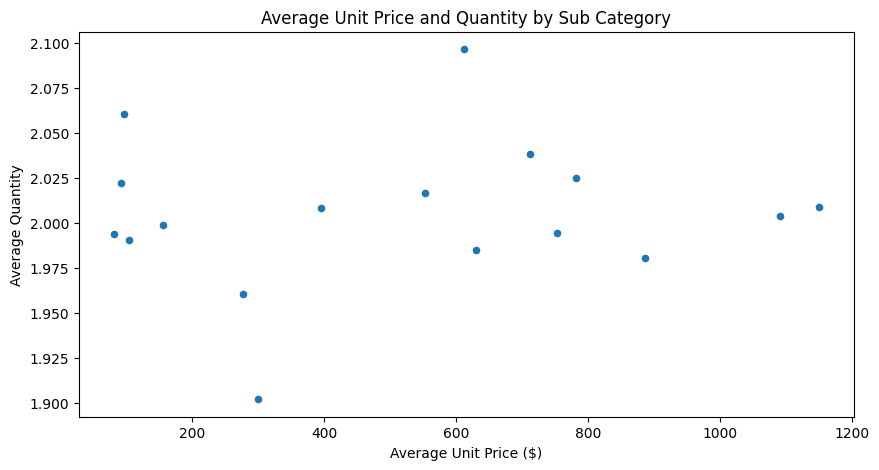

In [69]:
sales_data.groupby('Sub Category')['Unit Price', 'Quantity'].mean().plot(kind='scatter', x='Unit Price', y='Quantity', figsize=(10, 5))
plt.title('Average Unit Price and Quantity by Sub Category')
plt.xlabel('Average Unit Price ($)')
plt.ylabel('Average Quantity')
plt.show()

### Patterns in revenue by unit cost

Next, the analysis focused on identifying patterns in revenue by unit cost. The objective was to determine the extent to which unit cost influenced unit price and the impact it had on revenue for each product. To accomplish this, I first created a histogram to visualize the distribution of unit costs. 

At first look, the distribution of unit cost is right-skewed. While the majority of the data points have a lower unit cost values, there are a few outliers with much higher unit cost values, such as the Mountain and Touring bikes.

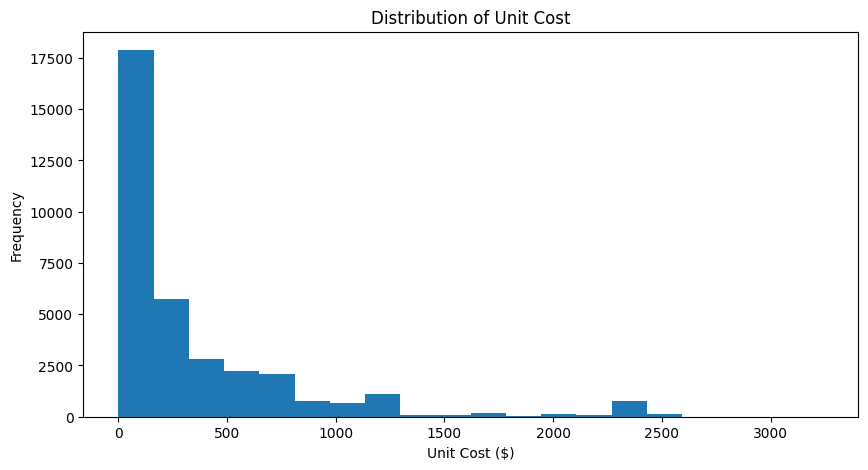

In [70]:
sales_data['Unit Cost'].plot(kind='hist', bins=20, figsize=(10, 5))
plt.title('Distribution of Unit Cost')
plt.xlabel('Unit Cost ($)')
plt.ylabel('Frequency')
plt.show()

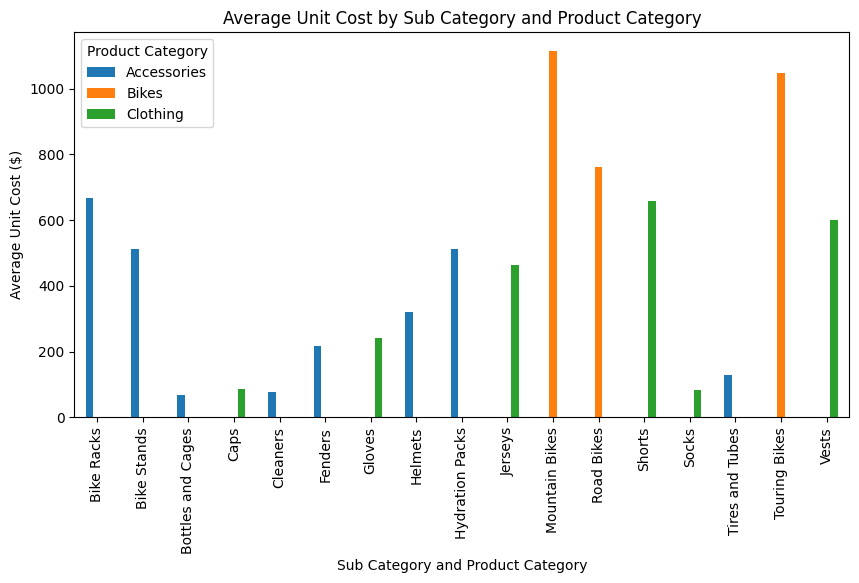

In [71]:
sales_data.groupby(['Sub Category', 'Product Category'])['Unit Cost'].mean().unstack().plot(kind='bar', figsize=(10, 5))
plt.title('Average Unit Cost by Sub Category and Product Category')
plt.xlabel('Sub Category and Product Category')
plt.ylabel('Average Unit Cost ($)')
plt.show()

An analysis of the data revealed a positive correlation between unit cost and revenue. This suggests that as the unit cost increases, revenue also increases for that subcategory. This correlation may indicate that products within this subcategory which have higher production costs also generate higher revenues. It is possible that this correlation is due to a variety of reasons such as high demand for the products in this subcategory, a higher perceived value or unique specialized features that justify the higher price point.

C:\Users\annco\AppData\Local\Temp\ipykernel_15508\2448939408.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sales_data.groupby('Sub Category')['Unit Cost', 'Revenue'].mean().plot(kind='scatter', x='Unit Cost', y='Revenue', figsize=(10, 5))


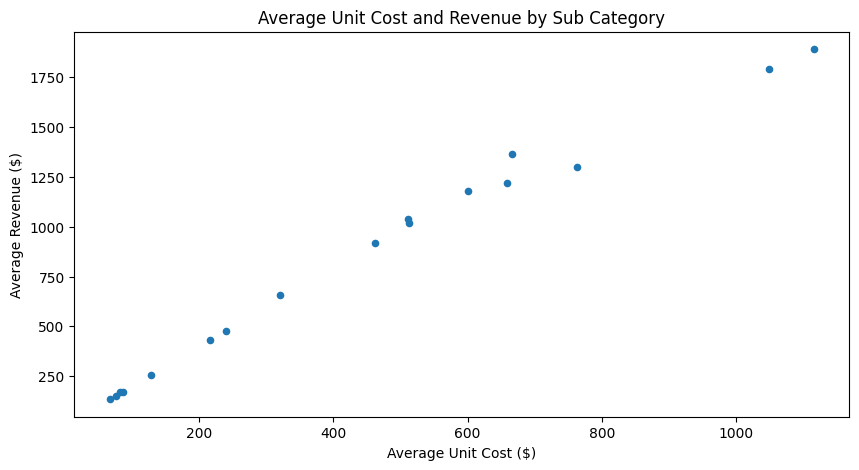

In [72]:
sales_data.groupby('Sub Category')['Unit Cost', 'Revenue'].mean().plot(kind='scatter', x='Unit Cost', y='Revenue', figsize=(10, 5))
plt.title('Average Unit Cost and Revenue by Sub Category')
plt.xlabel('Average Unit Cost ($)')
plt.ylabel('Average Revenue ($)')
plt.show()

# IV. Making Predictions

### What is driving revenue growth? How much revenue do we expect to generate?

In [73]:
sales_data.corr()

C:\Users\annco\AppData\Local\Temp\ipykernel_15508\3303374483.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sales_data.corr()


,index,Year,Customer Age,Quantity,Unit Cost,Unit Price,Cost,Revenue,Profit Margin
index,1.000000,0.003961,-0.045523,0.002157,-0.068250,-0.069691,-0.081392,-0.083341,0.011482
Year,0.003961,1.000000,0.049873,0.000919,-0.073245,-0.022628,-0.084566,-0.025361,0.438800
Customer Age,-0.045523,0.049873,1.000000,0.004383,0.022362,0.023412,0.023641,0.024836,0.003415
Quantity,0.002157,0.000919,0.004383,1.000000,-0.312514,-0.324109,0.008295,0.008418,0.003047
Unit Cost,-0.068250,-0.073245,0.022362,-0.312514,1.000000,0.981033,0.854908,0.836957,-0.301238
Unit Price,-0.069691,-0.022628,0.023412,-0.324109,0.981033,1.000000,0.832968,0.851034,-0.180396
Cost,-0.081392,-0.084566,0.023641,0.008295,0.854908,0.832968,1.000000,0.979119,-0.350018
Revenue,-0.083341,-0.025361,0.024836,0.008418,0.836957,0.851034,0.979119,1.000000,-0.211082
Profit Margin,0.011482,0.438800,0.003415,0.003047,-0.301238,-0.180396,-0.350018,-0.211082,1.000000


The correlation matrix shows the correlation between each variable and revenue. We see that Year is weakly positively correlated with Profit Margin, but has little correlation with the other variables. Customer Age has a weak negative correlation with Profit Margin, but also has little correlation with the other variables. Quantity has weak positive correlations with Cost and Revenue, but also has little correlation with the other variables.

The strongest positive correlation is between Unit Cost and Unit Price, and between Unit Price and Revenue. There is also a strong positive correlation between Cost and Revenue, which is to be expected since Revenue is derived from Cost and Unit Price. Profit Margin has negative correlations with Unit Cost and Unit Price, as expected since these factors are associated with the cost of goods sold.

Based on the correlation coefficient between the predictors and revenue, we will be using following predictors to build a multiple regression model to predict revenue:
- Unit Cost: 0.836957
- Unit Price: 0.851034

We dropped Cost as a predictor to help avoid issues of multicollinearity and difficulties in interpreting the results.

In [74]:
# Define the dependent and independent variables
y = sales_data['Revenue']
X = sales_data[['Unit Price', 'Unit Cost']]

# Add a constant term to the independent variables
X = sm.add_constant(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a linear regression model
model = sm.OLS(y_train, X_train).fit()

# Print the model summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                Revenue   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                 3.231e+04
Date:                Thu, 23 Feb 2023   Prob (F-statistic):               0.00
Time:                        16:49:26   Log-Likelihood:            -1.7987e+05
No. Observations:               24406   AIC:                         3.598e+05
Df Residuals:                   24403   BIC:                         3.598e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        178.8723      3.060     58.446      0.0

The multiple linear regression model utilized two predictors, unit price and unit cost, to predict the revenue of a bike company. The data was split into training and testing sets, with 30% of the data in the testing set. The model was built using the sm.OLS function in Python. The coefficients of unit price and unit cost were found to be 1.1060 and 0.0798, respectively. These values indicate that a one-unit increase in unit price is associated with a $1.11 increase in revenue, while a one-unit increase in unit cost is associated with a $0.08 increase in revenue. 

The R-squared value of 0.726 suggests that the model can explain 72.6% of the variation in revenue. The p-values of the coefficients are statistically significant (less than 0.05), indicating that the model is a good fit and can be used to predict revenue based on unit price and unit cost.

In [75]:
y_pred = model.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head(10)

,Actual,Predicted
7500,461.0,448.737527
30541,79.0,270.238938
5520,38.0,201.283658
17994,760.0,479.899871
24019,506.0,763.662136
26764,209.0,261.433287
29602,176.0,282.348810
1249,32.0,191.441760
28686,842.0,1157.556709
22996,528.0,486.307692


The results show the actual values for revenue and the predicted values from the OLS model using unit price and unit cost as predictors. 

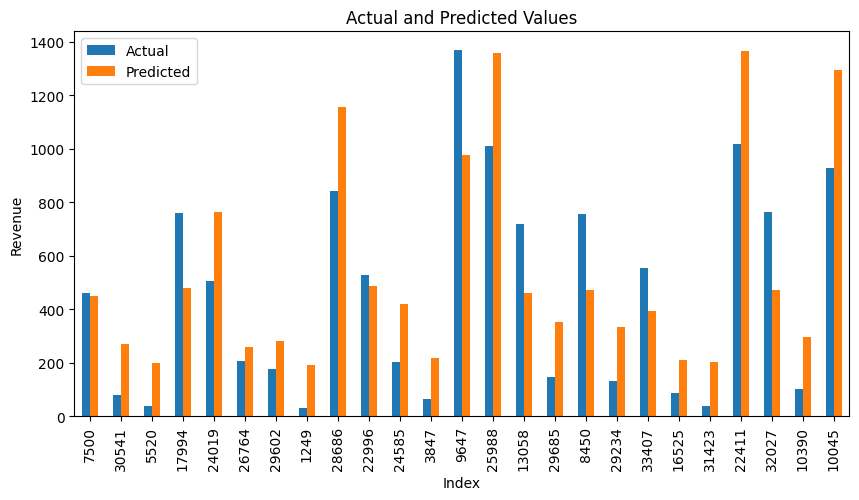

In [76]:
df1 = df.head(25)
df1.plot(kind='bar', figsize=(10, 5))
plt.title('Actual and Predicted Values')
plt.xlabel('Index')
plt.ylabel('Revenue')
plt.show()

In [77]:
mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)

mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

rmse = np.sqrt(mse)
print('Root Mean Squared Error:', rmse)

Mean Absolute Error: 279.0557789164767
Mean Squared Error: 154438.422562658
Root Mean Squared Error: 392.98654247016907


The model used to predict revenue based on unit price and unit cost was evaluated by comparing the predicted values to the actual values. 

The mean absolute error of the predictions was 279.06, indicating that on average, the predictions were off by $279. The mean squared error was 154438.42, which is the average of the squared differences between the predicted and actual values, and the root mean squared error was 392.99, indicating that the model's predictions were off by an average of $392.99. 

These results suggest that the model could be improved by adding additional predictors to better explain the variation in revenue.

In [96]:
# Split data into predictors and response variable
X = sales_data[["Quantity", "Unit Price", "Unit Cost"]]
y = sales_data["Revenue"]

# Add constant to predictors
X = sm.add_constant(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit OLS model
model_2 = sm.OLS(y_train, X_train).fit()

In [97]:
# Print summary of the model
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                Revenue   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                 3.584e+04
Date:                Thu, 23 Feb 2023   Prob (F-statistic):               0.00
Time:                        17:20:25   Log-Likelihood:            -1.7507e+05
No. Observations:               24406   AIC:                         3.502e+05
Df Residuals:                   24402   BIC:                         3.502e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -447.3334      6.298    -71.032      0.0

The second model has a higher R-squared value of 0.815, indicating that the model explains 81.5% of the variation in the revenue. The p-values for the coefficients are less than 0.05, indicating that the predictors are statistically significant in predicting revenue. The coefficients suggest that a one-unit increase in quantity is associated with a $287.40 increase in revenue, while a one-unit increase in unit price is associated with a $1.33 increase in revenue. However, the coefficient for unit cost is not statistically significant in this model, with a p-value of 0.454.

Overall, the second model that includes quantity as a predictor seems to be a better fit for the data, as it explains more of the variation in revenue and has a more significant predictor.

In [79]:
y_pred = model_2.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head(10)

,Actual,Predicted
7500,461.0,427.567976
30541,79.0,-62.478038
5520,38.0,144.961464
17994,760.0,746.227274
24019,506.0,507.044730
26764,209.0,500.210997
29602,176.0,237.215669
1249,32.0,421.213639
28686,842.0,956.138624
22996,528.0,472.057920


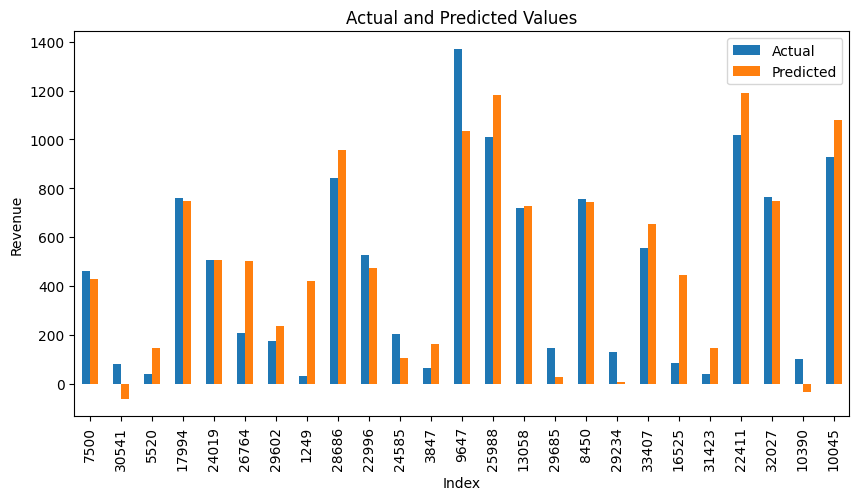

In [80]:
df1 = df.head(25)
df1.plot(kind='bar', figsize=(10, 5))
plt.title('Actual and Predicted Values')
plt.xlabel('Index')
plt.ylabel('Revenue')
plt.show()

In [81]:
mae_2 = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae_2)

mse_2 = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse_2)

rmse_2 = np.sqrt(mse)
print('Root Mean Squared Error:', rmse_2)

Mean Absolute Error: 229.4747300206424
Mean Squared Error: 102965.04904890993
Root Mean Squared Error: 392.98654247016907


In [82]:
print('R-squared value for model 1:', model.rsquared)
print('R-squared value for model 2:', model_2.rsquared)

print('Mean Squared Error for model 1:', mse)
print('Mean Squared Error for model 2:', mse_2)

print('AIC for model 1:', model.aic)
print('AIC for model 2:', model_2.aic)

R-squared value for model 1: 0.7258862477604358
R-squared value for model 2: 0.8145407968641319
Mean Squared Error for model 1: 154438.422562658
Mean Squared Error for model 2: 102965.04904890993
AIC for model 1: 359750.080928178
AIC for model 2: 500584.5808218704


The R-squared values of model 1 and model 2 are 0.726 and 0.815, respectively. This indicates that model 2 is a better fit for the data than model 1. The Mean Squared Error for model 1 and model 2 are 154438.42 and 102965.05, respectively. The lower MSE value of model 2 shows that it provides more accurate predictions. The AIC values of model 1 and model 2 are 359750.08 and 500584.58, respectively. The higher AIC value for model 2 suggests that it is a more complex model, but it also provides a better fit to the data.

In [83]:
new_customer = pd.DataFrame({'Quantity': [10], 'Unit Price': [100], 'Unit Cost': [50]})
new_customer = sm.add_constant(new_customer, has_constant='add')

model_2.predict(new_customer)

0    2551.980137
dtype: float64

A prediction model was created using model 2 to predict the revenue for a new customer. The input data for the new customer consists of 10 units, a unit price of 100, and a unit cost of 50. The sm.add_constant() function was used to add a constant to the input data, and the model was tested using model_2.predict() function. The predicted revenue for the new customer is $2551.98.

#### TO DO: Time Series Analysis: create time series analysis to predict the sales of the products over time, using features like year, month, and date.

In [126]:
# Create dummy variables for categorical variables
sales_dataset = pd.get_dummies(sales_data, columns=['Customer Gender', 'Country', 'State', 'Product Category', 'Sub Category'], drop_first=True)

# Split the data into training and testing sets
X = sales_data[['Quantity', 'Unit Price', 'Unit Cost', 'Year']]
y = sales_data['Revenue']

# Add constant to predictors
X = sm.add_constant(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [127]:
# Build the regression model using the training set
model_3 = sm.OLS(y_train, X_train).fit()

In [128]:
# Print the model summary
print(model_3.summary())

                            OLS Regression Results                            
Dep. Variable:                Revenue   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                 2.688e+04
Date:                Thu, 23 Feb 2023   Prob (F-statistic):               0.00
Time:                        17:32:50   Log-Likelihood:            -1.7507e+05
No. Observations:               24406   AIC:                         3.502e+05
Df Residuals:                   24401   BIC:                         3.502e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7627.1318   8527.375      0.894      0.3

In [117]:
# Evaluate the model using the testing set
y_pred = model_3.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head(10)

,Actual,Predicted
7500,461.0,425.288395
30541,79.0,-59.943057
5520,38.0,149.623635
17994,760.0,744.748301
24019,506.0,503.993069
26764,209.0,501.478889
29602,176.0,236.895528
1249,32.0,419.347533
28686,842.0,948.380279
22996,528.0,469.403031


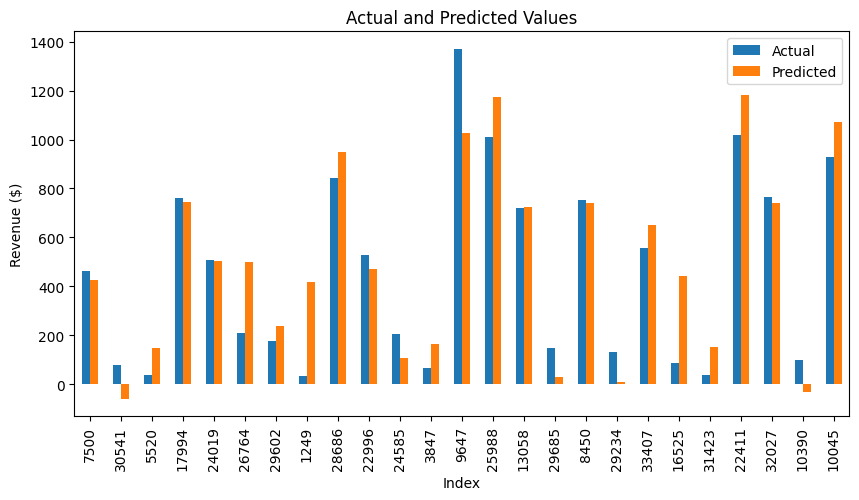

In [119]:
# Plot the actual and predicted values
df1 = df.head(25)
df1.plot(kind='bar', figsize=(10, 5))
plt.title('Actual and Predicted Values')
plt.xlabel('Index')
plt.ylabel('Revenue ($)')
plt.show()

In [120]:
mae_3 = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)

mse_3 = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

rmse_3 = np.sqrt(mse)
print('Root Mean Squared Error:', rmse)

Mean Absolute Error: 228.99882638283248
Mean Squared Error: 103287.60146939868
Root Mean Squared Error: 392.98654247016907


In [121]:
print('R-squared value for model 1:', model.rsquared)
print('R-squared value for model 2:', model_2.rsquared)
print('R-squared value for model 3:', model_3.rsquared)

print('Mean Squared Error for model 1:', mse)
print('Mean Squared Error for model 2:', mse_2)
print('Mean Squared Error for model 3:', mse_3)

print('AIC for model 1:', model.aic)
print('AIC for model 2:', model_2.aic)
print('AIC for model 3:', model_3.aic)

R-squared value for model 1: 0.7258862477604358
R-squared value for model 2: 0.8150383894742136
R-squared value for model 3: 0.8150451855009901
Mean Squared Error for model 1: 103287.60146939868
Mean Squared Error for model 2: 102965.04904890993
Mean Squared Error for model 3: 103287.60146939868
AIC for model 1: 359750.080928178
AIC for model 2: 350150.88544978044
AIC for model 3: 350151.98868598026
